In [24]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax
!pip install tabulate




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [2]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *
from Experiment import *
from sklearn.model_selection import KFold

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [3]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\German Credit\German_Credit_Ground_Truth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [4]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   checking-account                       1000 non-null   int64
 1   duration                               1000 non-null   int64
 2   credit-history                         1000 non-null   int64
 3   purpose                                1000 non-null   int64
 4   credit-amount                          1000 non-null   int64
 5   savings-account                        1000 non-null   int64
 6   employment-since                       1000 non-null   int64
 7   installment-rate                       1000 non-null   int64
 8   other-debtors                          1000 non-null   int64
 9   residence-since                        1000 non-null   int64
 10  property                               1000 non-null   int64
 11  age                            

Checking Number of unique values

In [5]:
groundTruth.nunique()

checking-account                           4
duration                                  33
credit-history                             5
purpose                                   10
credit-amount                            921
savings-account                            5
employment-since                           5
installment-rate                           4
other-debtors                              3
residence-since                            4
property                                   4
age                                       53
other-installment                          3
housing                                    3
existing-credits                           4
job                                        4
number-people-provide-maintenance-for      2
telephone                                  2
foreign-worker                             2
sex                                        2
marital-status                             2
class-label                                2
dtype: int

In [6]:
groundTruth.head(5)

checking-account  duration  credit-history  purpose  credit-amount  \
0                 1         6               0        7           1169   
1                 0        48               1        7           5951   
2                 3        12               0        4           2096   
3                 1        42               1        5           7882   
4                 1        24               2        1           4870   

   savings-account  employment-since  installment-rate  other-debtors  \
0                4                 3                 4              2   
1                2                 0                 2              2   
2                2                 1                 2              2   
3                2                 1                 2              1   
4                2                 0                 3              2   

   residence-since  ...  other-installment  housing  existing-credits  job  \
0                4  ...                  1        1                 2    0   
1                2  ...                  1        1                 1    0   
2                3  ...                  1        1                 1    1   
3                4  ...                  1        0                 1    0   
4                4  ...                  1        0                 2    0   

   number-people-provide-maintenance-for  telephone  foreign-worker  sex  \
0                                      1          1               1    1   
1                                      1          0               1    0   
2                                      2          0               1    1   
3                                      2          0               1    1   
4                                      2          0               1    1   

   marital-status  class-label  
0               0            1  
1               0            0  
2               0            1  
3               0            1  
4               0            0  

[5 rows x 22 columns]

In [7]:

scaler = StandardScaler()
groundTruth_scaled = pd.DataFrame(scaler.fit_transform(groundTruth), columns=groundTruth.columns)
print(groundTruth_scaled)


     checking-account  duration  credit-history   purpose  credit-amount  \
0           -0.464594 -1.236478       -1.031578  1.151303      -0.745131   
1           -1.262865  2.248194       -0.022206  1.151303       0.949817   
2            1.131948 -0.738668       -1.031578  0.047818      -0.416562   
3           -0.464594  1.750384       -0.022206  0.415646       1.634247   
4           -0.464594  0.256953        0.987166 -1.055668       0.566664   
..                ...       ...             ...       ...            ...   
995          1.131948 -0.738668       -0.022206  0.415646      -0.544162   
996         -0.464594  0.754763       -0.022206 -0.687839       0.207612   
997          1.131948 -0.738668       -0.022206  1.151303      -0.874503   
998         -0.464594  1.999289       -0.022206  1.151303      -0.505528   
999         -1.262865  1.999289       -1.031578 -0.687839       0.462457   

     savings-account  employment-since  installment-rate  other-debtors  \
0           

In [8]:
X= groundTruth_scaled.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth_scaled.iloc[:, -1]  # Selects all rows and only the last column

In [9]:
print("checking-account ",groundTruth_scaled['checking-account'].unique())
print("duration",groundTruth_scaled['duration'].unique())
print("credit-history",groundTruth_scaled['credit-history'].unique())
print("purpose",groundTruth_scaled['purpose'].unique())
#print("credit-amount",groundTruth_scaled['credit-amount'].unique())
print("savings-account",groundTruth_scaled['savings-account'].unique())
print("employment-since",groundTruth_scaled['employment-since'].unique())
print("other-debtors",groundTruth_scaled['other-debtors'].unique())
print("residence-since",groundTruth_scaled['residence-since'].unique())
print("property",groundTruth_scaled['property'].unique())
print("age",groundTruth_scaled['age'].unique())
print("other-installment",groundTruth_scaled['other-installment'].unique())
print("housing",groundTruth_scaled['housing'].unique())
print("existing-credits",groundTruth_scaled['existing-credits'].unique())
print("job",groundTruth_scaled['job'].unique())
print("number-people-provide-maintenance-for",groundTruth_scaled['number-people-provide-maintenance-for'].unique())
print("telephone",groundTruth_scaled['telephone'].unique())
print("foreign-worker",groundTruth_scaled['foreign-worker'].unique())
print("sex",groundTruth_scaled['sex'].unique())
print("marital-status",groundTruth_scaled['marital-status'].unique())
print("class-label",groundTruth_scaled['class-label'].unique())

checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38

Converting GroudTruth to Tensor

In [10]:
groundTruth_tensor = torch.tensor((groundTruth_scaled.to_numpy()))

In [11]:
print(torch.unique(groundTruth_tensor[:,19])) # coloumn 19 is sex where 1 is male and 0 is female.after scaling male is 0.6703 and female is -1.4919

tensor([-1.4919,  0.6703])


In [12]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-5.1017)
maximum: tensor(5.3708)
mean:  tensor(1.2919e-18)
median:  tensor(-0.0222)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [13]:
bucket_specs = {
     
    11: 4,   # Column 11 → age (4 bins)
    19: 2,  # Column 19 → sex (2 bins) [male : 1, female: 0]
    21: 2,  # Column 21 → label  (2 bins)
    5: 5,   # Column 5 → savings-account (5 bins)
    15: 4,   # Column 15 → jobs (4 bins)
    0: 4, #column 0 -> checking-account (4 bins)
    3: 10, #column 3 -> purpose (10 bins)
    1: 5,  #column 1 -> duration (5 bins)
    2: 5, #column 2 -> credit history (5 bins)
    6: 5, #employment-since
    18:2,
    4:10
    
}

# Define multiple attributes for X, Y, Z
X_cols = [11,18,19]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [21]     # Bucketized outcome-related attributes
Z_cols = [1,2,4,5]  


**CMI for GroundTruth**

In [14]:
#groundTruth_tensor = groundTruth_tensor.float()
groundTruth_tensor.requires_grad=True
cmi_groundTruth = CMI.c_m_i(groundTruth_tensor,bucket_specs,X_cols, Y_cols, Z_cols)
print(cmi_groundTruth)

tensor(0.2024, grad_fn=<ClampBackward1>)


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [15]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
print(type(miss_mcar25))
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

<class 'pandas.core.frame.DataFrame'>
Total Missing Percentage MAR25: 25.00%
checking-account                         25.6
duration                                 26.9
credit-history                           23.1
purpose                                  25.4
credit-amount                            23.8
savings-account                          22.3
employment-since                         23.1
installment-rate                         23.9
other-debtors                            25.8
residence-since                          23.6
property                                 23.6
age                                      27.0
other-installment                        25.4
housing                                  27.1
existing-credits                         26.8
job                                      26.8
number-people-provide-maintenance-for    25.4
telephone                                25.5
foreign-worker                           27.4
sex                                      22.6
mar

In [16]:
miss_mcar25_numpy = miss_mcar25.to_numpy()
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

In [17]:
print(torch.unique(miss_mcar25_tensor[:,19]))

tensor([-1.4919,  0.6703,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     n

Applying Sinkhorn algorithm to MCAR 25% data

In [18]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:", on_sk_mae_mcar25)


0.7811306403705942


INFO:root:batchsize = 128, epsilon = 0.7811
INFO:root:Iteration 0:	 Loss: 5.8895	 Validation MAE: 0.7750	RMSE: 0.9959
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\geomloss\samples_loss.py:47: SyntaxWarning: invalid escape sequence '\i'
  """Creates a criterion that computes distances between sampled measures on a vector space.


KeyboardInterrupt: 

Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [19]:
#only CMI
on_cmi_missmcar25 = CMI.c_m_i(on_sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:", on_cmi_missmcar25)
print("MAE:",on_sk_mae_mcar25)

CMI: tensor(0.1663, grad_fn=<ClampBackward1>)
MAE: tensor(0.6931, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [21]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25, lamda_cmi_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:",sk_mae_mcar25)





0.7736138454675903


INFO:root:Iteration 0:	 Loss: 5.3403	 Validation MAE: 0.7718	RMSE: 1.0131
INFO:root:Iteration 50:	 Loss: 5.8560	 Validation MAE: 0.7152	RMSE: 1.0068
INFO:root:Iteration 100:	 Loss: 6.0040	 Validation MAE: 0.7003	RMSE: 1.0002
INFO:root:Iteration 150:	 Loss: 5.9955	 Validation MAE: 0.6962	RMSE: 1.0000
INFO:root:Iteration 200:	 Loss: 5.8032	 Validation MAE: 0.6925	RMSE: 0.9985
INFO:root:Iteration 250:	 Loss: 5.6369	 Validation MAE: 0.6902	RMSE: 0.9980
INFO:root:Iteration 300:	 Loss: 5.5094	 Validation MAE: 0.6908	RMSE: 0.9989
INFO:root:Iteration 350:	 Loss: 5.9632	 Validation MAE: 0.6897	RMSE: 0.9984
INFO:root:Iteration 400:	 Loss: 5.9653	 Validation MAE: 0.6889	RMSE: 0.9982
INFO:root:Iteration 450:	 Loss: 6.3902	 Validation MAE: 0.6889	RMSE: 0.9987
INFO:root:Iteration 500:	 Loss: 5.6913	 Validation MAE: 0.6894	RMSE: 0.9999
INFO:root:Iteration 550:	 Loss: 5.4229	 Validation MAE: 0.6898	RMSE: 1.0010
INFO:root:Iteration 600:	 Loss: 5.9171	 Validation MAE: 0.6895	RMSE: 1.0015
INFO:root:Itera

MAE: tensor(0.6934, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [22]:
#CMI
sk_cmi_mcar25 = CMI.c_m_i(sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",sk_cmi_mcar25)
print("MAE",sk_mae_mcar25)

CMI tensor(0.0001, grad_fn=<ClampBackward1>)
MAE tensor(0.6934, grad_fn=<DivBackward0>)


Mean imputation, MAE and CMI

In [23]:

mean_imp_mcar25 = SimpleImputer().fit_transform(miss_mcar25_tensor)
mean_imp_mcar25_torch = torch.tensor(mean_imp_mcar25)
mean_mae_mcar25 = MAE(mean_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)

print("MAE",mean_mae_mcar25)

cmi_mean_mcar25 = CMI.c_m_i(mean_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_mean_mcar25)

MAE tensor(0.7690, grad_fn=<DivBackward0>)
CMI tensor(0.1953, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [24]:
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mcar25_tensor)
ice_imp_mcar25_torch = torch.tensor(ice_imp_mcar25)
ice_mae_mcar25 = MAE(ice_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",ice_mae_mcar25)

cmi_ice_mcar25 = CMI.c_m_i(ice_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_ice_mcar25)

MAE tensor(0.7318, grad_fn=<DivBackward0>)
CMI tensor(0.2222, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [25]:
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(miss_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((miss_mcar25_numpy), lbda_mcar25)[1]
soft_imp_mcar25_torch = torch.tensor(soft_imp_mcar25)

soft_mae_mcar25 = MAE(soft_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",soft_mae_mcar25)

cmi_soft_mcar25 = CMI.c_m_i(soft_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_soft_mcar25)

MAE tensor(0.7271, grad_fn=<DivBackward0>)
CMI tensor(0.1874, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iteration

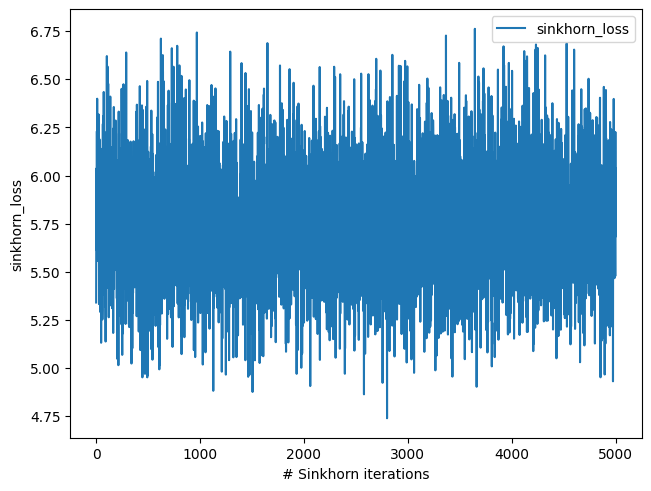

In [26]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

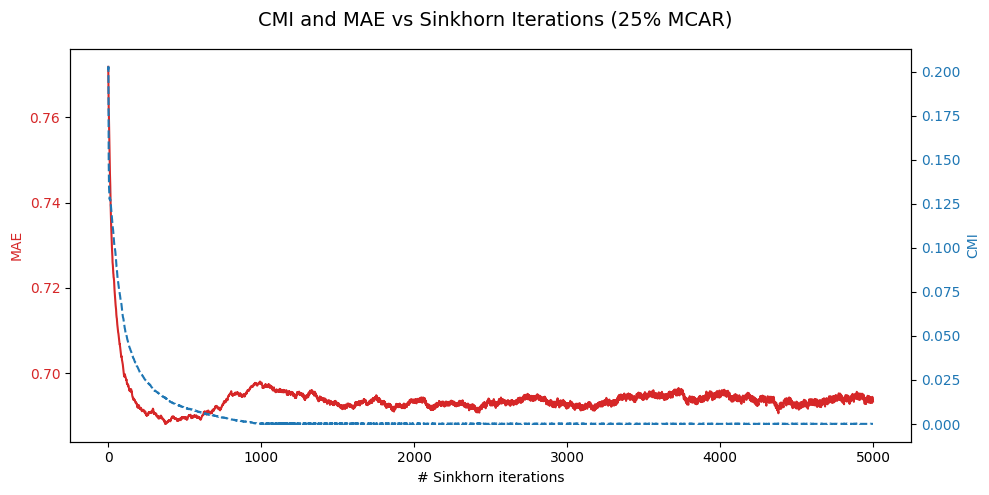

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mcar25
mae_array = sk_maes25mcar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MCAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

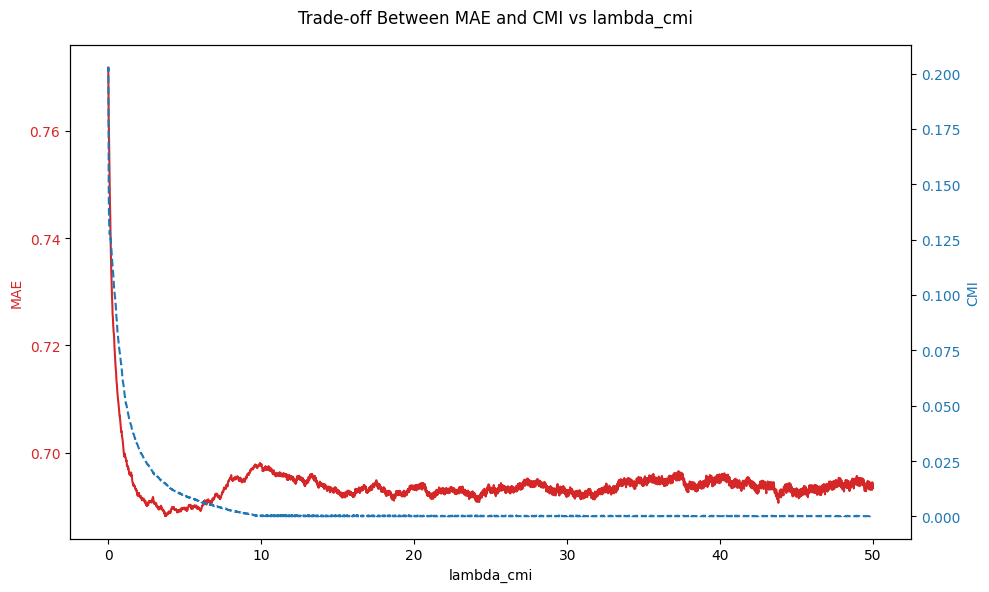

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mcar25 # list of length 2000 from your model
mae_history = sk_maes25mcar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mcar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert to arrays
mae_array_mcar25 = np.array(sk_maes25mcar)
cmi_array_mcar25 = np.array(cmi_loss_mcar25)
lambda_array_mcar25 = np.array(lamda_cmi_mcar25)

# OPTIONAL: Skip very low lambda values (e.g., lambda = 0)
min_index = 10  # or 0 if you want to include everything

# ---- Option 1: Visual Match (Rescale CMI to MAE's range) ----
min_mae_mcar25, max_mae_mcar25 = mae_array_mcar25.min(), mae_array_mcar25.max()
min_cmi_mcar25, max_cmi_mcar25 = cmi_array_mcar25.min(), cmi_array_mcar25.max()

# Rescale CMI to the MAE axis range
cmi_rescaled_mcar25 = (cmi_array_mcar25 - min_cmi_mcar25) / (max_cmi_mcar25 - min_cmi_mcar25) * (max_mae_mcar25 - min_mae_mcar25) + min_mae_mcar25

# Compute difference between MAE and rescaled CMI
diff_mcar25 = np.abs(mae_array_mcar25[min_index:] - cmi_rescaled_mcar25[min_index:])
intersection_idx_mcar25 = np.argmin(diff_mcar25) + min_index  # add offset

# ---- Extract Values at Intersection ----
lambda_intersection_mcra25 = lambda_array_mcar25[intersection_idx_mcar25]
mae_val_mcar25 = mae_array_mcar25[intersection_idx_mcar25]
cmi_val_mcar25 = cmi_array_mcar25[intersection_idx_mcar25]

# ---- Display Result ----
print("Estimated Visual Intersection Point MCAR25:")
print(f"  lambda_cmi_mcar25 = {lambda_intersection_mcra25:.4f}")
print(f"  MAE_mcar25        = {mae_val_mcar25:.4f}")
print(f"  CMI_mcar25        = {cmi_val_mcar25:.4f}")


Estimated Visual Intersection Point MCAR25:
  lambda_cmi_mcar25 = 6.2400
  MAE_mcar25        = 0.6906
  CMI_mcar25        = 0.0061


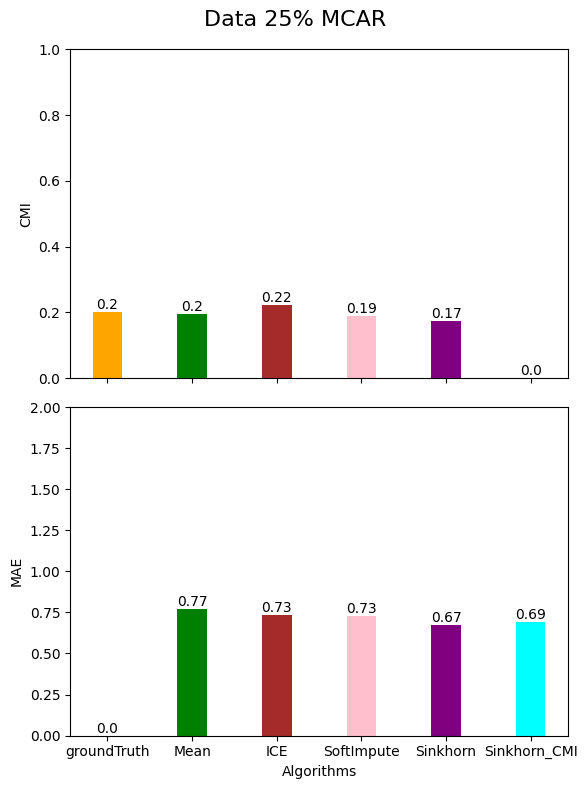

In [30]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth.detach(),cmi_mean_mcar25.detach(),cmi_ice_mcar25.detach(),cmi_soft_mcar25.detach(),on_cmi_missmcar25.detach(),sk_cmi_mcar25.detach()]
values_maes_mcar25 = [0.0,mean_mae_mcar25.detach(),ice_mae_mcar25.detach(), soft_mae_mcar25.detach(),on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [23]:
mean_age = groundTruth_scaled["age"].mean()
median_employment = groundTruth_scaled["employment-since"].median()
mean_credithistory = groundTruth_scaled["credit-history"].mean()
mean_residencesince = groundTruth_scaled["residence-since"].mean()
median_property = groundTruth_scaled["property"].median()



dependencies_mar = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] > mean_age else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.1
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.2 
    },
    
    "job": {
        "influencers": ["employment-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["employment-since"] < median_employment else 0.2 
    },

    "purpose": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },

    "other-installment": {
        "influencers": ["credit-history"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["credit-history"] < mean_credithistory else 0.2 
    },

     "housing": {
        "influencers": ["residence-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["residence-since"] >= mean_residencesince else 0.2 
    },
     "other-debtors": {
        "influencers": ["property"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["property"] < median_property else 0.2 
    },

     "foreign-worker": {
        "influencers": ["telephone"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["telephone"] == 1.21459768 else 0.2 
    },
     "number-people-provide-maintenance-for": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"] == 3.14158642 else 0.2 
    }



}


"""""
checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38183106  1.20474283]
age [ 2.76645648 -1.19140394  1.18331231  0.8315025   1.53512213 -0.04802204
  2.23874176 -0.66368922 -0.92754658 -1.01549903  2.15078931 -0.3118794
  0.74355005 -0.39983186  1.09535986 -0.83959412  0.03993041  0.30378778
  0.56764514 -0.13597449  2.41464667 -0.75164167 -0.48778431  1.88693195
 -0.22392695  0.12788287  1.9748844  -1.10345149 -0.57573676  1.44716968
  1.27126477  0.91945495  1.35921722  0.47969268  0.39174023  2.67850403
  1.00740741  1.79897949  1.62307458 -1.36730885 -1.27935639  0.21583532
  3.03031385  2.59055158  3.38212366  2.85440894  0.65559759  1.71102704
  2.50259912  3.47007612 -1.4552613   2.32669422  2.06283685]
other-installment [ 0.21834568 -2.15497697  2.59166834]
...
foreign-worker [ 0.19601428 -5.10166904]
sex [ 0.67028006 -1.49191369]
marital-status [-0.31831052  3.14158642]
class-label [ 0.65465367 -1.52752523]
"""""""""

'""\nchecking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]\nduration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373\n  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815\n -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468\n -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463\n  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625\n  0.42288986  4.23943563  1.58444727]\ncredit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]\npurpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657\n -0.32001086  1.519132    0.78347486  1.88696057]\nsavings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]\nemployment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]\nother-debtors [ 0.30110915 -1.94597406 -4.19305728]\nresidence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]\nproperty [-1.2639924

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [16]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

(1000, 21)
Total Missing Percentage MAR25: 23.86%


In [30]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

checking-account                         50.8
duration                                 32.3
credit-history                            0.0
purpose                                  52.9
credit-amount                            48.0
savings-account                          53.1
employment-since                         16.1
installment-rate                          0.0
other-debtors                            45.3
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        60.3
housing                                  50.4
existing-credits                          0.0
job                                      43.1
number-people-provide-maintenance-for    37.0
telephone                                 0.0
foreign-worker                           35.7
sex                                       0.0
marital-status                            0.0
class-label                       

In [31]:
miss_mar25_numpy = miss_mar25.to_numpy()
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [35]:
print(miss_mar25.head(5))

   checking-account  duration  credit-history   purpose  credit-amount  \
0         -0.464594       NaN       -1.031578  1.151303            NaN   
1               NaN  2.248194       -0.022206       NaN       0.949817   
2               NaN -0.738668       -1.031578  0.047818            NaN   
3         -0.464594       NaN       -0.022206       NaN       1.634247   
4         -0.464594  0.256953        0.987166 -1.055668            NaN   

   savings-account  employment-since  installment-rate  other-debtors  \
0              NaN               NaN          0.918477            NaN   
1              NaN         -1.134975         -0.870183       0.301109   
2        -0.130531         -0.390729         -0.870183       0.301109   
3        -0.130531               NaN         -0.870183      -1.945974   
4        -0.130531               NaN          0.024147            NaN   

   residence-since  ...  other-installment  housing  existing-credits  \
0         1.046987  ...                NaN 

Applying Sinkhorn algorithm to MAR 25% data

In [36]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",on_sk_mae_mar25)

0.7922060754653142


INFO:root:batchsize = 128, epsilon = 0.7922
INFO:root:Iteration 0:	 Loss: 5.9077	 Validation MAE: 0.7268	RMSE: 1.0016
INFO:root:Iteration 50:	 Loss: 5.5748	 Validation MAE: 0.6611	RMSE: 0.9814


INFO:root:Iteration 100:	 Loss: 5.7035	 Validation MAE: 0.6496	RMSE: 0.9772
INFO:root:Iteration 150:	 Loss: 5.4633	 Validation MAE: 0.6454	RMSE: 0.9752
INFO:root:Iteration 200:	 Loss: 5.5730	 Validation MAE: 0.6427	RMSE: 0.9732
INFO:root:Iteration 250:	 Loss: 5.8362	 Validation MAE: 0.6405	RMSE: 0.9714
INFO:root:Iteration 300:	 Loss: 5.7627	 Validation MAE: 0.6395	RMSE: 0.9700
INFO:root:Iteration 350:	 Loss: 5.4635	 Validation MAE: 0.6383	RMSE: 0.9682
INFO:root:Iteration 400:	 Loss: 5.1789	 Validation MAE: 0.6395	RMSE: 0.9689
INFO:root:Iteration 450:	 Loss: 5.6505	 Validation MAE: 0.6381	RMSE: 0.9675
INFO:root:Iteration 500:	 Loss: 5.8741	 Validation MAE: 0.6387	RMSE: 0.9679
INFO:root:Iteration 550:	 Loss: 5.5766	 Validation MAE: 0.6388	RMSE: 0.9682
INFO:root:Iteration 600:	 Loss: 5.0578	 Validation MAE: 0.6375	RMSE: 0.9673
INFO:root:Iteration 650:	 Loss: 5.8293	 Validation MAE: 0.6363	RMSE: 0.9666
INFO:root:Iteration 700:	 Loss: 5.3701	 Validation MAE: 0.6363	RMSE: 0.9667
INFO:root:It

MAE: tensor(0.6392, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [37]:
#only CMI
on_cmi_missmar25 = CMI.c_m_i(on_sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmar25)
print("MAE:",on_sk_mae_mar25)

CMI: tensor(0.1478, grad_fn=<ClampBackward1>)
MAE: tensor(0.6392, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [38]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()



sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25,lamda_cmi_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",sk_mae_mar25)


0.7922060754653142


INFO:root:Iteration 0:	 Loss: 4.9691	 Validation MAE: 0.7274	RMSE: 1.0025


INFO:root:Iteration 50:	 Loss: 5.5192	 Validation MAE: 0.6676	RMSE: 0.9852
INFO:root:Iteration 100:	 Loss: 5.6715	 Validation MAE: 0.6584	RMSE: 0.9800
INFO:root:Iteration 150:	 Loss: 5.0880	 Validation MAE: 0.6561	RMSE: 0.9791
INFO:root:Iteration 200:	 Loss: 5.6829	 Validation MAE: 0.6536	RMSE: 0.9759
INFO:root:Iteration 250:	 Loss: 5.2779	 Validation MAE: 0.6520	RMSE: 0.9748
INFO:root:Iteration 300:	 Loss: 5.2504	 Validation MAE: 0.6507	RMSE: 0.9743
INFO:root:Iteration 350:	 Loss: 5.8379	 Validation MAE: 0.6503	RMSE: 0.9740
INFO:root:Iteration 400:	 Loss: 5.7420	 Validation MAE: 0.6509	RMSE: 0.9741
INFO:root:Iteration 450:	 Loss: 6.1018	 Validation MAE: 0.6514	RMSE: 0.9750
INFO:root:Iteration 500:	 Loss: 5.1094	 Validation MAE: 0.6503	RMSE: 0.9749
INFO:root:Iteration 550:	 Loss: 5.3791	 Validation MAE: 0.6505	RMSE: 0.9736
INFO:root:Iteration 600:	 Loss: 5.7789	 Validation MAE: 0.6488	RMSE: 0.9721
INFO:root:Iteration 650:	 Loss: 5.0441	 Validation MAE: 0.6488	RMSE: 0.9729
INFO:root:Ite

MAE: tensor(0.6473, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [39]:
#CMI
cmi_mar25 = CMI.c_m_i(sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mar25)
print("MAE:",sk_mae_mar25)

CMI: tensor(0.0001, grad_fn=<ClampBackward1>)
MAE: tensor(0.6473, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [40]:

mean_imp_mar25 = SimpleImputer().fit_transform(miss_mar25_tensor)
mean_imp_mar25_torch = torch.tensor(mean_imp_mar25)
mean_mae_mar25 = MAE(mean_imp_mar25_torch, groundTruth_tensor , mask_mar25)

print("MAE:",mean_mae_mar25)

cmi_mean_mar25 = CMI.c_m_i(mean_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mar25)

MAE: tensor(0.7264, grad_fn=<DivBackward0>)
CMI: tensor(0.1708, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [41]:
ice_imp_mar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mar25_tensor)
ice_imp_mar25_torch = torch.tensor(ice_imp_mar25)
ice_mae_mar25 = MAE(ice_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",ice_mae_mar25)

cmi_ice_mar25 = CMI.c_m_i(ice_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mar25)

MAE: tensor(0.8243, grad_fn=<DivBackward0>)
CMI: tensor(0.2121, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [42]:
cv_error_mar25, grid_lambda_mar25 = cv_softimpute(miss_mar25_numpy, grid_len=15)
lbda_mar25 = grid_lambda_mar25[np.argmin(cv_error_mar25)]
soft_imp_mar25 = softimpute((miss_mar25_numpy), lbda_mar25)[1]
soft_imp_mar25_torch = torch.tensor(soft_imp_mar25)

soft_mae_mar25 = MAE(soft_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",soft_mae_mar25)

cmi_soft_mar25 = CMI.c_m_i(soft_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mar25)

MAE: tensor(0.6733, grad_fn=<DivBackward0>)
CMI: tensor(0.1685, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iterations

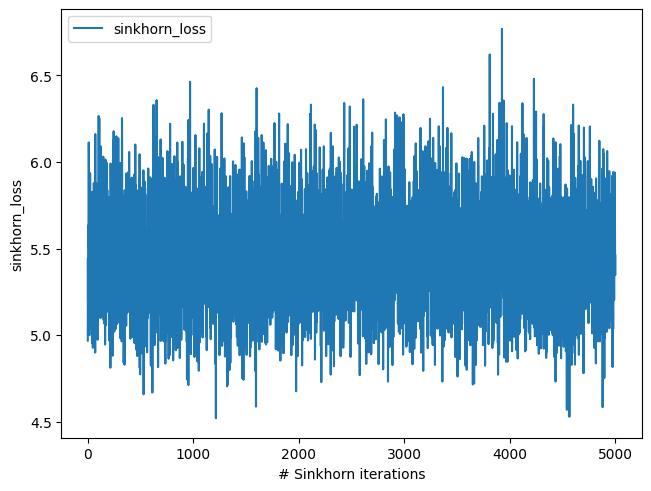

In [43]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

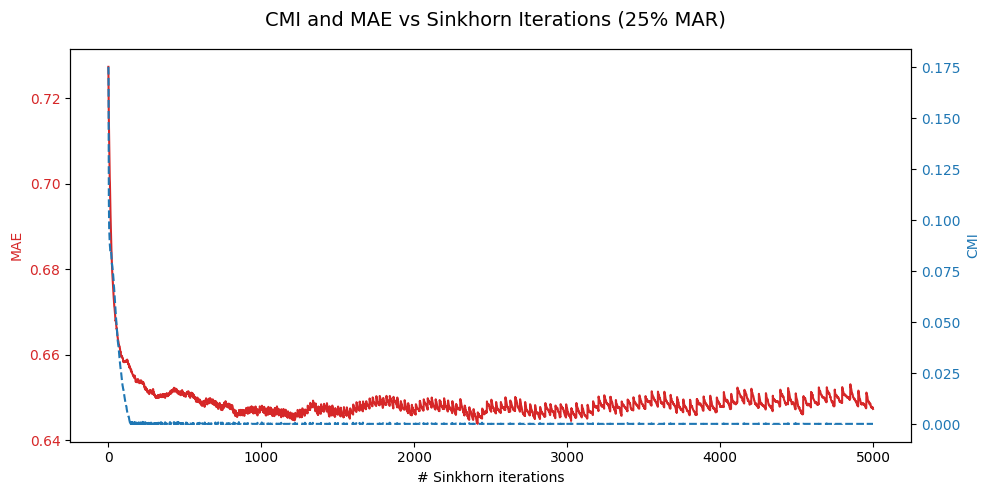

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mar25
mae_array = sk_maes25mar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

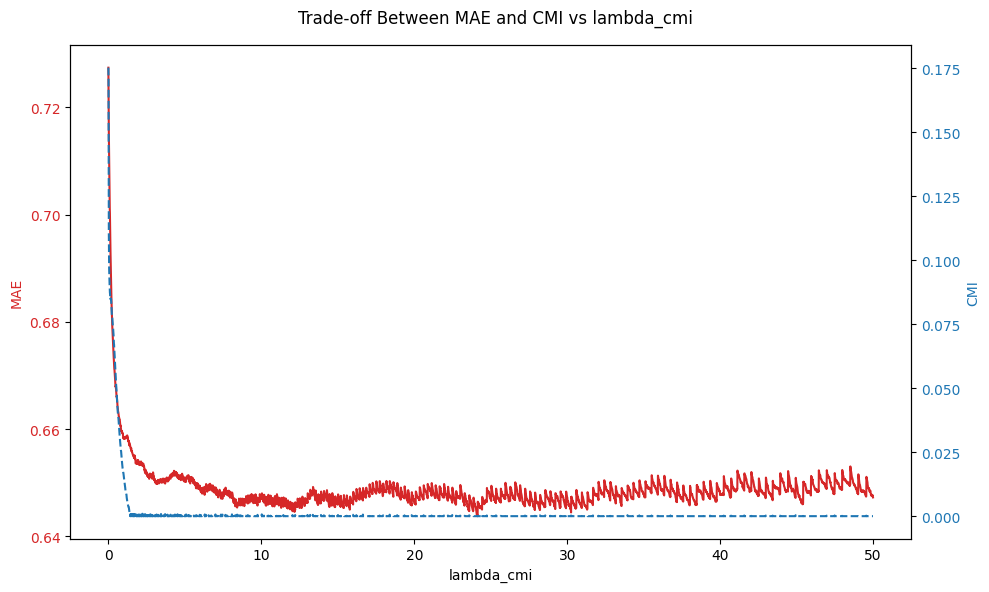

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mar25 # list of length 2000 from your model
mae_history = sk_maes25mar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


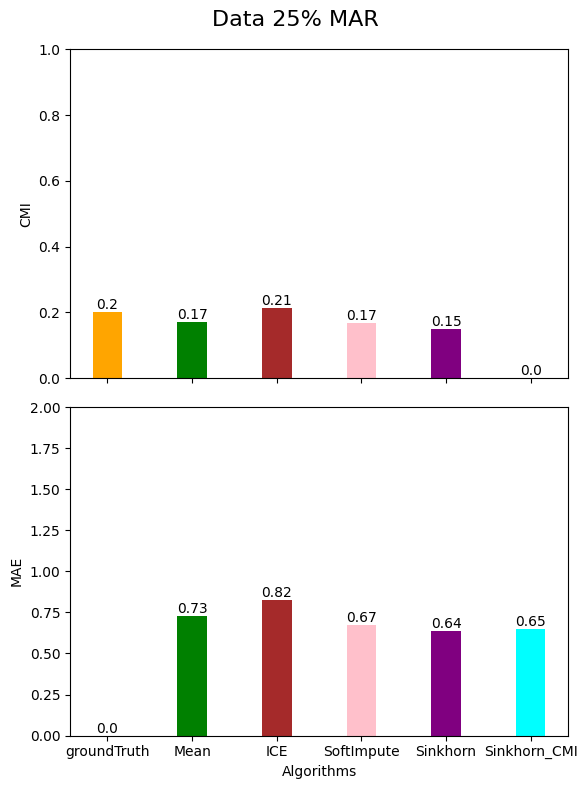

In [46]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth.detach(),cmi_mean_mar25.detach(),cmi_ice_mar25.detach(),cmi_soft_mar25.detach(),on_cmi_missmar25.detach(),cmi_mar25.detach()]
values_maes_mar25 = [0.0,mean_mae_mar25.detach(),ice_mae_mar25.detach(), soft_mae_mar25.detach(),on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [19]:
mean_age = groundTruth_scaled["age"].mean()
median_employment = groundTruth_scaled["employment-since"].median()
mean_credithistory = groundTruth_scaled["credit-history"].mean()
mean_residencesince = groundTruth_scaled["residence-since"].mean()
median_property = groundTruth_scaled["property"].median()
mean_checkingaccount = groundTruth_scaled["checking-account"].mean()
median_duration = groundTruth_scaled["duration"].median()
mean_creditamount = groundTruth_scaled["credit-amount"].mean()

mean_job = groundTruth_scaled["job"].mean()
median_otherinstallment = groundTruth_scaled["other-installment"].median()
mean_housing = groundTruth_scaled["housing"].mean()
median_purpose = groundTruth_scaled["purpose"].median()


dependencies_mnar = {
    "checking-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["checking-account"] < mean_checkingaccount else 0.05
    },
    "duration": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["duration"] <= median_duration  else 0.05
    },
    "savings-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != -0.13053135 else 0.1
    },
    "employment-since": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] == median_employment else 0.1
    },
    "credit-amount": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > mean_creditamount else 0.05
    },
    "job": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["job"] < mean_job else 0.05
    },

    "other-installment": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-installment"] == median_otherinstallment else 0.2 
    },

    "housing": {
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["housing"] <= mean_housing else 0.2 
    },

    "other-debtors": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-debtors"]==-1.94597406  else 0.2 
    },

     "foreign-worker": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["foreign-worker"]==0.19601428 else 0.2 
    },
     "number-people-provide-maintenance-for": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["number-people-provide-maintenance-for"] == -0.42828957 else 0.2 
    },
     "sex": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.2 
    },

    "purpose": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["purpose"] < median_purpose else 0.2 
    }



}

"""""""""""

checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38183106  1.20474283]
age [ 2.76645648 -1.19140394  1.18331231  0.8315025   1.53512213 -0.04802204
  2.23874176 -0.66368922 -0.92754658 -1.01549903  2.15078931 -0.3118794
  0.74355005 -0.39983186  1.09535986 -0.83959412  0.03993041  0.30378778
  0.56764514 -0.13597449  2.41464667 -0.75164167 -0.48778431  1.88693195
 -0.22392695  0.12788287  1.9748844  -1.10345149 -0.57573676  1.44716968
  1.27126477  0.91945495  1.35921722  0.47969268  0.39174023  2.67850403
  1.00740741  1.79897949  1.62307458 -1.36730885 -1.27935639  0.21583532
  3.03031385  2.59055158  3.38212366  2.85440894  0.65559759  1.71102704
  2.50259912  3.47007612 -1.4552613   2.32669422  2.06283685]
other-installment [ 0.21834568 -2.15497697  2.59166834]
housing [-0.13371046 -2.01695631  1.7495354 ]
existing-credits [ 1.02707891 -0.704926    2.75908382  4.49108873]
job [-0.68447267  0.53345023  1.75137314  2.96929604]
number-people-provide-maintenance-for [-0.42828957  2.33486893]
telephone [ 1.21459768 -0.82331789]
foreign-worker [ 0.19601428 -5.10166904]
sex [ 0.67028006 -1.49191369]
marital-status [-0.31831052  3.14158642]
class-label [ 0.65465367 -1.52752523]

"""""""""


'""\n\nchecking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]\nduration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373\n  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815\n -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468\n -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463\n  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625\n  0.42288986  4.23943563  1.58444727]\ncredit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]\npurpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657\n -0.32001086  1.519132    0.78347486  1.88696057]\nsavings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]\nemployment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]\nother-debtors [ 0.30110915 -1.94597406 -4.19305728]\nresidence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]\nproperty [-1.26399

Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [48]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [49]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         39.7
duration                                 41.8
credit-history                            0.0
purpose                                  51.5
credit-amount                            22.8
savings-account                          37.2
employment-since                         24.4
installment-rate                          0.0
other-debtors                            38.0
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        62.3
housing                                  61.9
existing-credits                          0.0
job                                      31.5
number-people-provide-maintenance-for    36.6
telephone                                 0.0
foreign-worker                           39.8
sex                                      37.5
marital-status                            0.0
class-label                       

In [50]:
miss_mnar25_numpy = miss_mnar25.to_numpy()
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [51]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",on_sk_mae_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7952


0.7951969665804696


INFO:root:Iteration 0:	 Loss: 5.4872	 Validation MAE: 0.8026	RMSE: 1.0358
INFO:root:Iteration 50:	 Loss: 5.4238	 Validation MAE: 0.7296	RMSE: 1.0141


INFO:root:Iteration 100:	 Loss: 5.7939	 Validation MAE: 0.7132	RMSE: 1.0062
INFO:root:Iteration 150:	 Loss: 5.5155	 Validation MAE: 0.7061	RMSE: 1.0026
INFO:root:Iteration 200:	 Loss: 5.6970	 Validation MAE: 0.7007	RMSE: 0.9995
INFO:root:Iteration 250:	 Loss: 5.6768	 Validation MAE: 0.6958	RMSE: 0.9953
INFO:root:Iteration 300:	 Loss: 5.5735	 Validation MAE: 0.6930	RMSE: 0.9936
INFO:root:Iteration 350:	 Loss: 6.0413	 Validation MAE: 0.6929	RMSE: 0.9939
INFO:root:Iteration 400:	 Loss: 5.0535	 Validation MAE: 0.6912	RMSE: 0.9924
INFO:root:Iteration 450:	 Loss: 5.6594	 Validation MAE: 0.6885	RMSE: 0.9901
INFO:root:Iteration 500:	 Loss: 5.9196	 Validation MAE: 0.6889	RMSE: 0.9911
INFO:root:Iteration 550:	 Loss: 5.5270	 Validation MAE: 0.6872	RMSE: 0.9899
INFO:root:Iteration 600:	 Loss: 5.9974	 Validation MAE: 0.6872	RMSE: 0.9898
INFO:root:Iteration 650:	 Loss: 6.3544	 Validation MAE: 0.6881	RMSE: 0.9897
INFO:root:Iteration 700:	 Loss: 5.3599	 Validation MAE: 0.6867	RMSE: 0.9888
INFO:root:It

MAE: tensor(0.6844, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [52]:
#only CMI
on_cmi_missmnar25 = CMI.c_m_i(on_sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmnar25)
print("MAE:",on_sk_mae_mnar25)

CMI: tensor(0.1954, grad_fn=<ClampBackward1>)
MAE: tensor(0.6844, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [53]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi=500)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25, lamda_cmi_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",sk_mae_mnar25)





0.7951969665804696


INFO:root:Iteration 0:	 Loss: 5.1924	 Validation MAE: 0.8028	RMSE: 1.0377


INFO:root:Iteration 50:	 Loss: 5.7227	 Validation MAE: 0.7364	RMSE: 1.0195
INFO:root:Iteration 100:	 Loss: 5.6672	 Validation MAE: 0.7218	RMSE: 1.0125
INFO:root:Iteration 150:	 Loss: 5.8500	 Validation MAE: 0.7158	RMSE: 1.0112
INFO:root:Iteration 200:	 Loss: 5.6373	 Validation MAE: 0.7087	RMSE: 1.0080
INFO:root:Iteration 250:	 Loss: 5.6230	 Validation MAE: 0.7065	RMSE: 1.0070
INFO:root:Iteration 300:	 Loss: 5.4922	 Validation MAE: 0.7061	RMSE: 1.0077
INFO:root:Iteration 350:	 Loss: 5.9018	 Validation MAE: 0.7060	RMSE: 1.0080
INFO:root:Iteration 400:	 Loss: 5.9362	 Validation MAE: 0.7058	RMSE: 1.0083
INFO:root:Iteration 450:	 Loss: 6.4458	 Validation MAE: 0.7053	RMSE: 1.0076
INFO:root:Iteration 500:	 Loss: 5.5214	 Validation MAE: 0.7040	RMSE: 1.0082
INFO:root:Iteration 550:	 Loss: 5.7463	 Validation MAE: 0.7034	RMSE: 1.0075
INFO:root:Iteration 600:	 Loss: 5.7952	 Validation MAE: 0.7031	RMSE: 1.0071
INFO:root:Iteration 650:	 Loss: 5.3398	 Validation MAE: 0.7041	RMSE: 1.0067
INFO:root:Ite

MAE: tensor(0.7218, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [54]:
#CMI
cmi_mnar25 = CMI.c_m_i(sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mnar25)
print("MAE:",sk_mae_mnar25)

CMI: tensor(0.0001, grad_fn=<ClampBackward1>)
MAE: tensor(0.7218, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [55]:

mean_imp_mnar25 = SimpleImputer().fit_transform(miss_mnar25_tensor)
mean_imp_mnar25_torch = torch.tensor(mean_imp_mnar25)
mean_mae_mnar25 = MAE(mean_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)

print("MAE:",mean_mae_mnar25)

cmi_mean_mnar25 = CMI.c_m_i(mean_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mnar25)

MAE: tensor(0.8014, grad_fn=<DivBackward0>)
CMI: tensor(0.2242, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [56]:
ice_imp_mnar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mnar25_tensor)
ice_imp_mnar25_torch = torch.tensor(ice_imp_mnar25)
ice_mae_mnar25 = MAE(ice_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",ice_mae_mnar25)

cmi_ice_mnar25 = CMI.c_m_i(ice_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mnar25)

MAE: tensor(0.8576, grad_fn=<DivBackward0>)
CMI: tensor(0.2671, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [57]:
cv_error_mnar25, grid_lambda_mnar25 = cv_softimpute(miss_mnar25_numpy, grid_len=15)
lbda_mnar25 = grid_lambda_mnar25[np.argmin(cv_error_mnar25)]
soft_imp_mnar25 = softimpute((miss_mnar25_numpy), lbda_mnar25)[1]
soft_imp_mnar25_torch = torch.tensor(soft_imp_mnar25)

soft_mae_mnar25 = MAE(soft_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",soft_mae_mnar25)

cmi_soft_mnar25 = CMI.c_m_i(soft_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mnar25)

MAE: tensor(0.6483, grad_fn=<DivBackward0>)
CMI: tensor(0.2168, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Interations

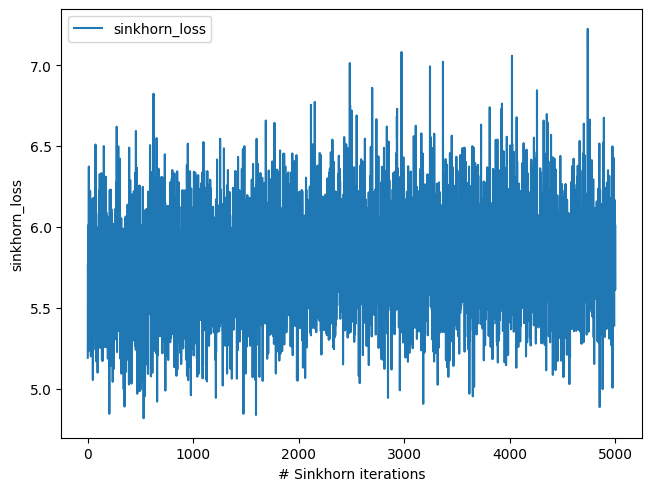

In [58]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

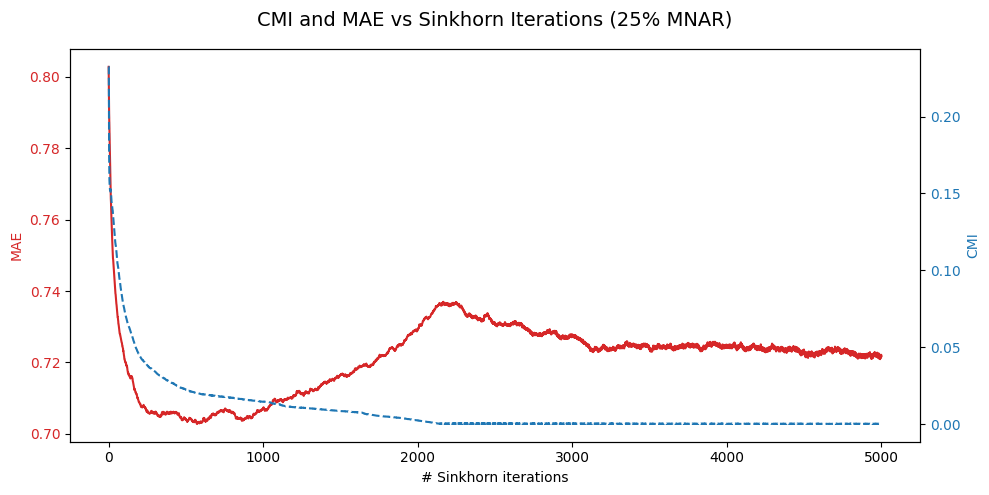

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mnar25
mae_array = sk_maes25mnar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MNAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

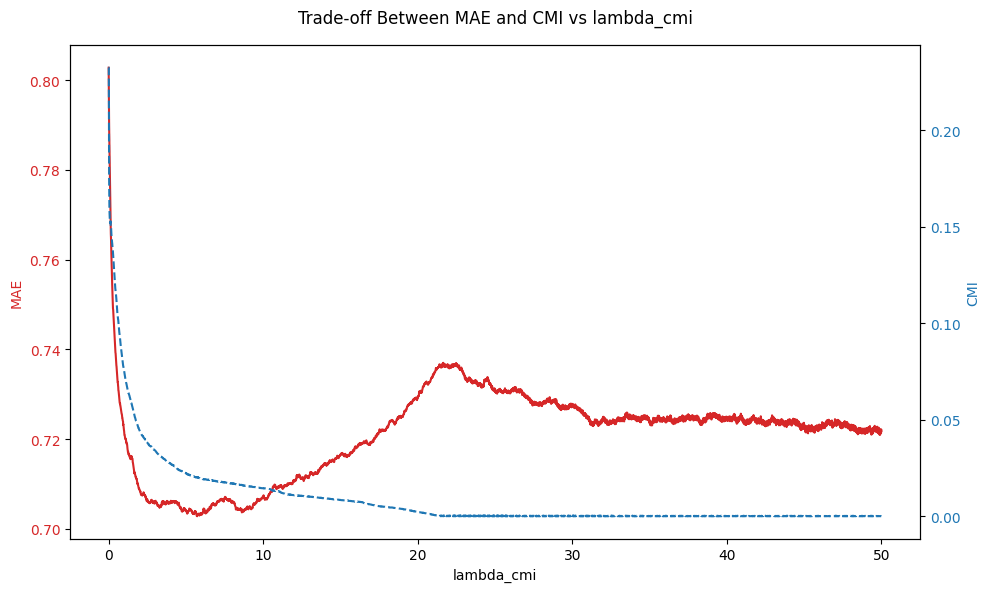

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mnar25 # list of length 2000 from your model
mae_history = sk_maes25mnar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mnar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


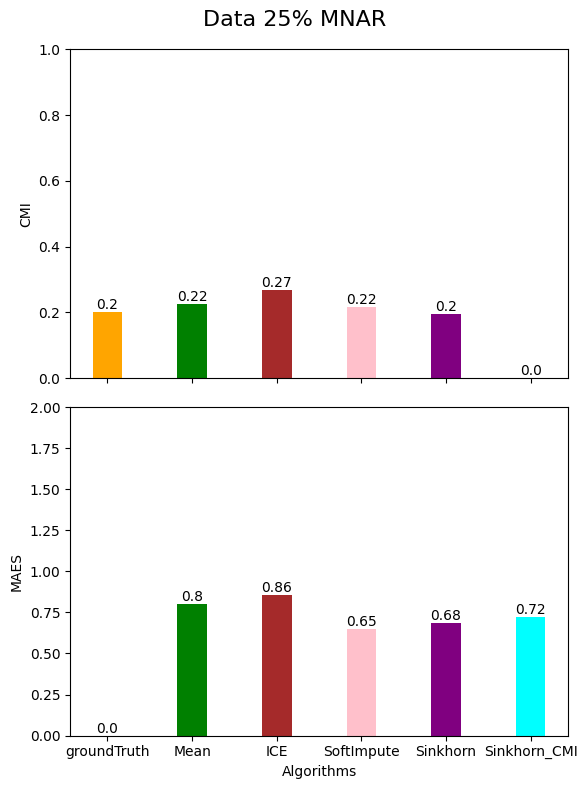

In [61]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth.detach(),cmi_mean_mnar25.detach(),cmi_ice_mnar25.detach(),cmi_soft_mnar25.detach(),on_cmi_missmnar25.detach(),cmi_mnar25.detach()]
values_maes_mnar25 = [0.0,mean_mae_mnar25.detach(),ice_mae_mnar25.detach(), soft_mae_mnar25.detach(),on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


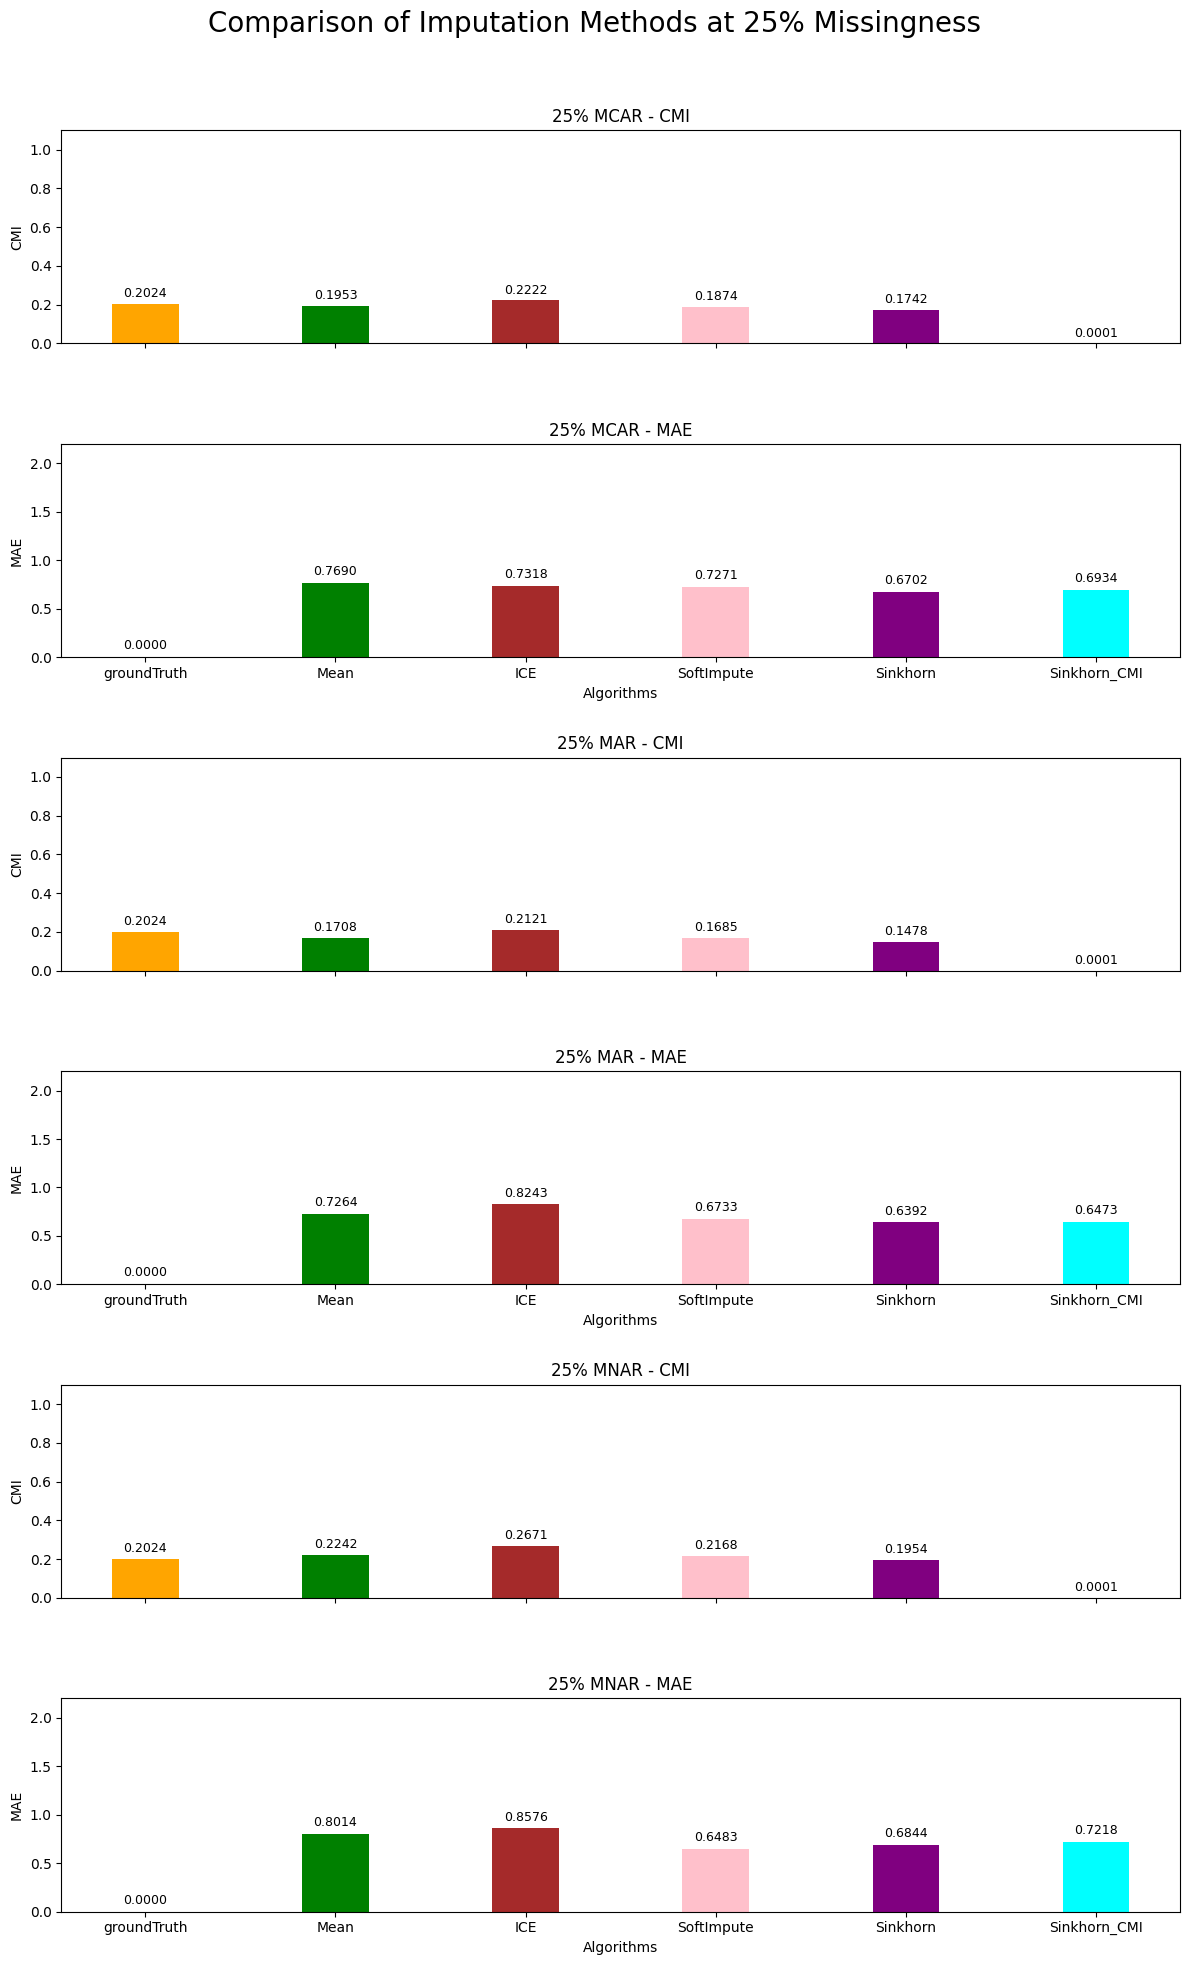

In [62]:
fig, axes = plt.subplots(6, 1, figsize=(12, 20), sharex=False)
fig.suptitle('Comparison of Imputation Methods at 25% Missingness', fontsize=20)

# MCAR, MAR, MNAR order
plot_data = [
    ("25% MCAR", values_cmi_mcar25, values_maes_mcar25),
    ("25% MAR", values_cmi_mar25, values_maes_mar25),
    ("25% MNAR", values_cmi_mnar25, values_maes_mnar25),
]

for i, (title, cmi_vals, mae_vals) in enumerate(plot_data):
    ax_cmi = axes[i * 2]
    ax_mae = axes[i * 2 + 1]

    # ----------------- CMI Plot -----------------
    bars1 = ax_cmi.bar(index, cmi_vals, color=colors, width=bar_width)
    ax_cmi.set_ylabel("CMI")
    ax_cmi.set_ylim(0, 1.1)
    ax_cmi.set_title(f"{title} - CMI")
    for bar in bars1:
        yval = bar.get_height()
        ax_cmi.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    # Remove x-axis labels and ticks for CMI
    ax_cmi.set_xticks(index)
    ax_cmi.set_xticklabels([])

    # ----------------- MAE Plot -----------------
    bars2 = ax_mae.bar(index, mae_vals, color=colors, width=bar_width)
    ax_mae.set_ylabel("MAE")
    ax_mae.set_ylim(0, 2.2)
    ax_mae.set_title(f"{title} - MAE")
    for bar in bars2:
        yval = bar.get_height()
        ax_mae.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    ax_mae.set_xticks(index)
    ax_mae.set_xticklabels(categories, fontsize=10, rotation=0)
    ax_mae.set_xlabel("Algorithms")

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5)
plt.show()


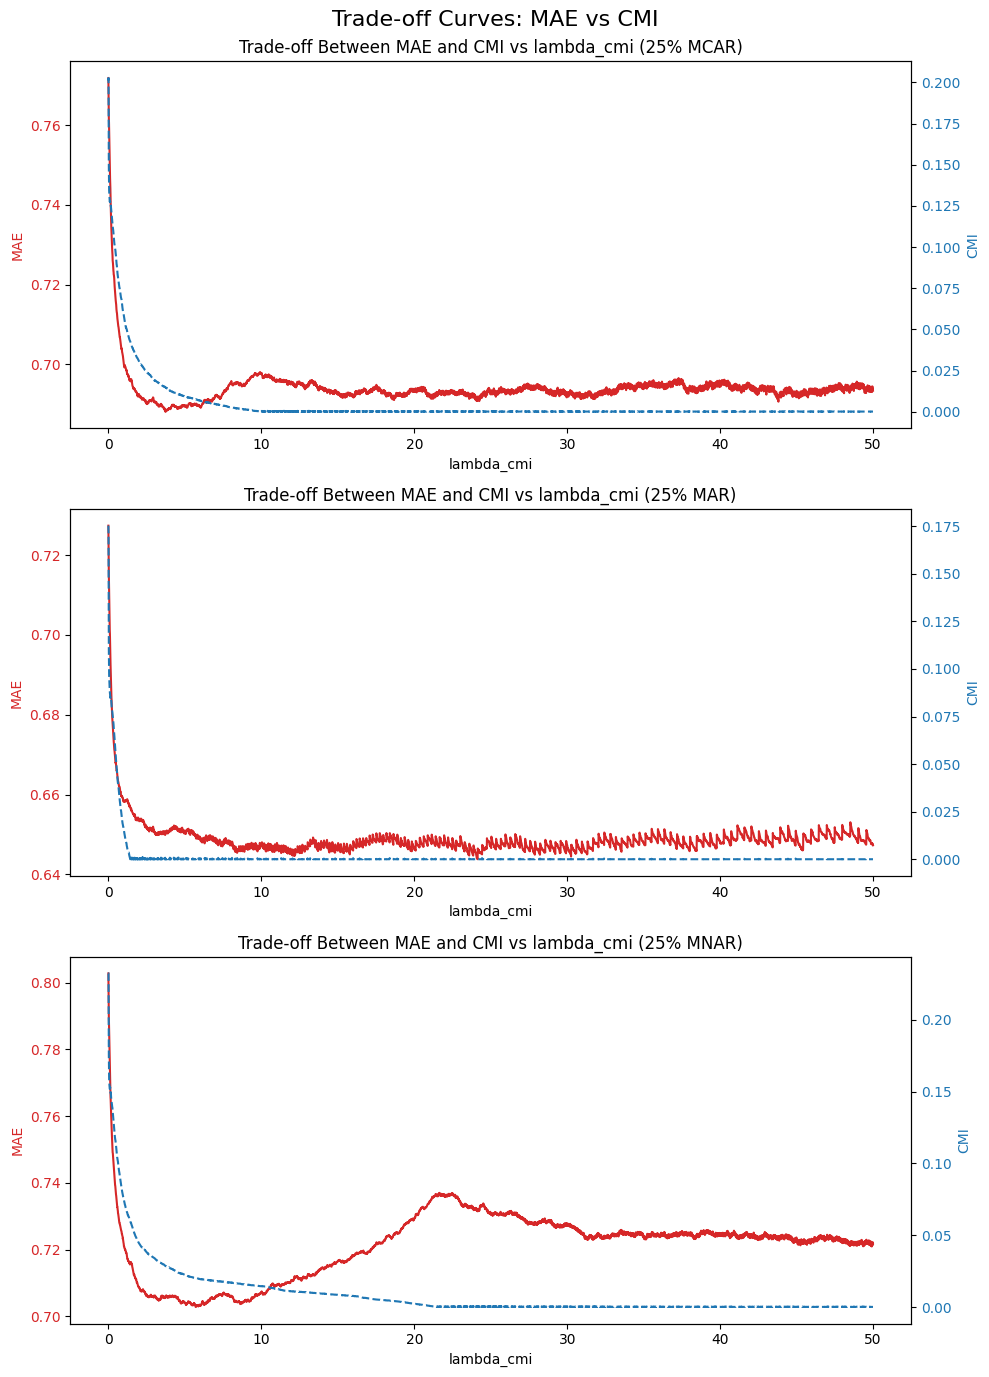

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# New order: MCAR, MAR, MNAR
datasets = [
    ("25% MCAR", lamda_cmi_mcar25, sk_maes25mcar, cmi_loss_mcar25),
    ("25% MAR", lamda_cmi_mar25, sk_maes25mar, cmi_loss_mar25),
    ("25% MNAR", lamda_cmi_mnar25, sk_maes25mnar, cmi_loss_mnar25),
]

for i, (title, lambda_vals, mae_vals, cmi_vals) in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # MAE (left y-axis)
    ax1.set_ylabel('MAE', color='tab:red')
    ax1.plot(lambda_vals, mae_vals, color='tab:red', label='MAE')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # CMI (right y-axis)
    ax2.set_ylabel('CMI', color='tab:blue')
    ax2.plot(lambda_vals, cmi_vals, color='tab:blue', linestyle='--', label='CMI')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_title(f'Trade-off Between MAE and CMI vs lambda_cmi ({title})')
    ax1.set_xlabel('lambda_cmi')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle('Trade-off Curves: MAE vs CMI', fontsize=16)
plt.show()


### MCAR

### 5% MCAR

In [67]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mcar_sk_mae5, mcar_sk_cmi5, mcar_skCmi_mae5, mcar_skCmi_cmi5, mcar_mean_mae5, mcar_mean_cmi5, mcar_ice_mae5, mcar_ice_cmi5, mcar_soft_mae5,  mcar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.9903
INFO:root:Iteration 0:	 Loss: 7.2392	 Validation MAE: 0.7648	RMSE: 0.9969
INFO:root:Iteration 50:	 Loss: 7.2378	 Validation MAE: 0.6872	RMSE: 0.9635
INFO:root:Iteration 100:	 Loss: 6.8563	 Validation MAE: 0.6723	RMSE: 0.9502
INFO:root:Iteration 150:	 Loss: 6.7589	 Validation MAE: 0.6659	RMSE: 0.9467
INFO:root:Iteration 200:	 Loss: 7.1111	 Validation MAE: 0.6629	RMSE: 0.9451
INFO:root:Iteration 250:	 Loss: 7.0682	 Validation MAE: 0.6605	RMSE: 0.9434
INFO:root:Iteration 300:	 Loss: 6.6949	 Validation MAE: 0.6594	RMSE: 0.9420
INFO:root:Iteration 350:	 Loss: 6.9771	 Validation MAE: 0.6582	RMSE: 0.9423
INFO:root:Iteration 400:	 Loss: 6.9243	 Validation MAE: 0.6563	RMSE: 0.9389
INFO:root:Iteration 450:	 Loss: 6.7446	 Validation MAE: 0.6571	RMSE: 0.9408
INFO:root:Iteration 500:	 Loss: 6.5439	 Validation MAE: 0.6583	RMSE: 0.9438
INFO:root:Iteration 550:	 Loss: 7.0572	 Validation MAE: 0.6601	RMSE: 0.9455
INFO:root:Iteration 600:	 Loss: 6.6961	 Validat

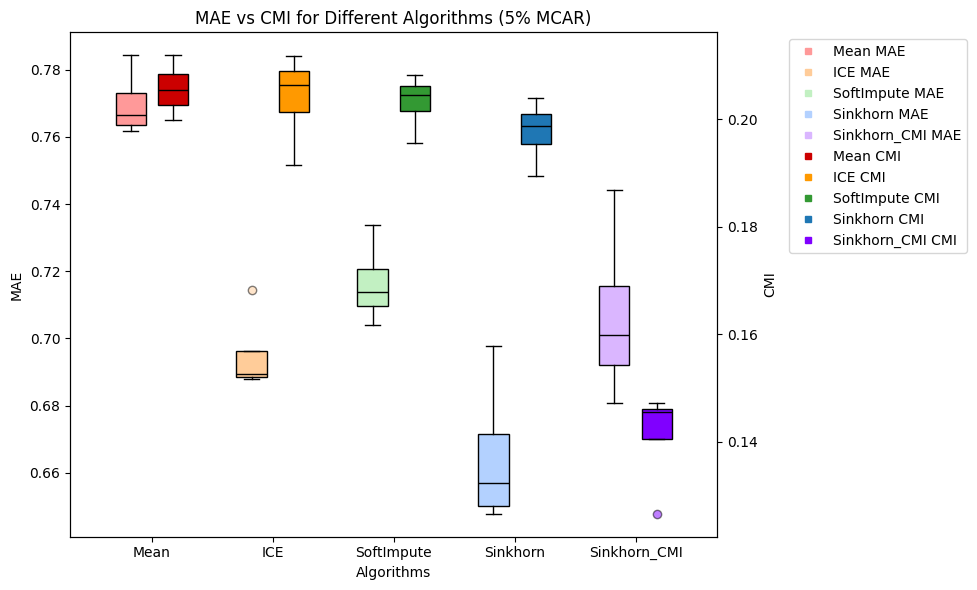

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar5 = {
    'Mean': mcar_mean_cmi5,
    'ICE': mcar_ice_cmi5,
    'SoftImpute': mcar_soft_cmi5,
    'Sinkhorn': mcar_sk_cmi5,
    'Sinkhorn_CMI': mcar_skCmi_cmi5
}
mae_data_mcar5 = {
    'Mean': mcar_mean_mae5,
    'ICE': mcar_ice_mae5,
    'SoftImpute': mcar_soft_mae5,
    'Sinkhorn': mcar_sk_mae5,
    'Sinkhorn_CMI': mcar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar5[algo]
    cmi_vals = cmi_data_mcar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 10% MCAR

In [69]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae10, mcar_sk_cmi10, mcar_skCmi_mae10, mcar_skCmi_cmi10, mcar_mean_mae10, mcar_mean_cmi10, mcar_ice_mae10, mcar_ice_cmi10, mcar_soft_mae10, mcar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.9298
INFO:root:Iteration 0:	 Loss: 7.0561	 Validation MAE: 0.7962	RMSE: 1.0347
INFO:root:Iteration 50:	 Loss: 6.7614	 Validation MAE: 0.7259	RMSE: 1.0120


INFO:root:Iteration 100:	 Loss: 6.3708	 Validation MAE: 0.7117	RMSE: 1.0039
INFO:root:Iteration 150:	 Loss: 6.7175	 Validation MAE: 0.7065	RMSE: 1.0017
INFO:root:Iteration 200:	 Loss: 6.4943	 Validation MAE: 0.7044	RMSE: 1.0008
INFO:root:Iteration 250:	 Loss: 6.6309	 Validation MAE: 0.6987	RMSE: 0.9951
INFO:root:Iteration 300:	 Loss: 7.0691	 Validation MAE: 0.6982	RMSE: 0.9951
INFO:root:Iteration 350:	 Loss: 6.1145	 Validation MAE: 0.6962	RMSE: 0.9932
INFO:root:Iteration 400:	 Loss: 6.7608	 Validation MAE: 0.6956	RMSE: 0.9947
INFO:root:Iteration 450:	 Loss: 6.5465	 Validation MAE: 0.6913	RMSE: 0.9921
INFO:root:Iteration 500:	 Loss: 6.8540	 Validation MAE: 0.6930	RMSE: 0.9931
INFO:root:Iteration 550:	 Loss: 6.7501	 Validation MAE: 0.6920	RMSE: 0.9918
INFO:root:Iteration 600:	 Loss: 6.5931	 Validation MAE: 0.6929	RMSE: 0.9919
INFO:root:Iteration 650:	 Loss: 7.1621	 Validation MAE: 0.6926	RMSE: 0.9907
INFO:root:Iteration 700:	 Loss: 6.4237	 Validation MAE: 0.6942	RMSE: 0.9934
INFO:root:It

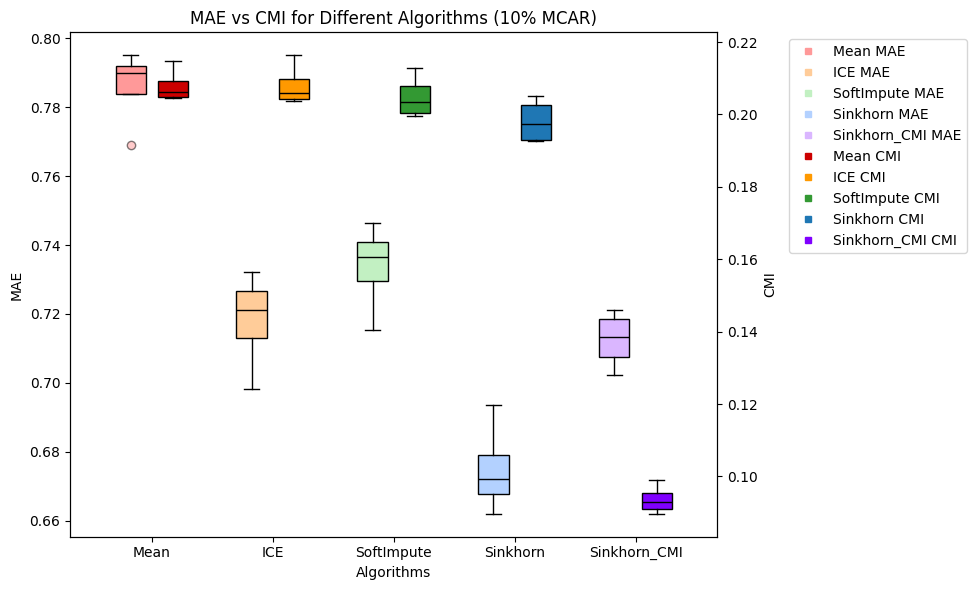

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar10 = {
    'Mean': mcar_mean_cmi10,
    'ICE': mcar_ice_cmi10,
    'SoftImpute': mcar_soft_cmi10,
    'Sinkhorn': mcar_sk_cmi10,
    'Sinkhorn_CMI': mcar_skCmi_cmi10
}
mae_data_mcar10 = {
    'Mean': mcar_mean_mae10,
    'ICE': mcar_ice_mae10,
    'SoftImpute': mcar_soft_mae10,
    'Sinkhorn': mcar_sk_mae10,
    'Sinkhorn_CMI': mcar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar10[algo]
    cmi_vals = cmi_data_mcar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MCAR

In [71]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae15, mcar_sk_cmi15, mcar_skCmi_mae15, mcar_skCmi_cmi15, mcar_mean_mae15, mcar_mean_cmi15, mcar_ice_mae15, mcar_ice_cmi15, mcar_soft_mae15, mcar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.8871
INFO:root:Iteration 0:	 Loss: 6.5611	 Validation MAE: 0.7713	RMSE: 1.0052
INFO:root:Iteration 50:	 Loss: 5.9680	 Validation MAE: 0.6953	RMSE: 0.9783


INFO:root:Iteration 100:	 Loss: 6.7663	 Validation MAE: 0.6817	RMSE: 0.9699
INFO:root:Iteration 150:	 Loss: 6.3341	 Validation MAE: 0.6744	RMSE: 0.9644
INFO:root:Iteration 200:	 Loss: 6.6132	 Validation MAE: 0.6693	RMSE: 0.9601
INFO:root:Iteration 250:	 Loss: 6.0889	 Validation MAE: 0.6659	RMSE: 0.9575
INFO:root:Iteration 300:	 Loss: 5.6097	 Validation MAE: 0.6643	RMSE: 0.9573
INFO:root:Iteration 350:	 Loss: 6.1786	 Validation MAE: 0.6619	RMSE: 0.9563
INFO:root:Iteration 400:	 Loss: 6.3365	 Validation MAE: 0.6621	RMSE: 0.9580
INFO:root:Iteration 450:	 Loss: 6.3325	 Validation MAE: 0.6616	RMSE: 0.9571
INFO:root:Iteration 500:	 Loss: 6.2728	 Validation MAE: 0.6632	RMSE: 0.9577
INFO:root:Iteration 550:	 Loss: 6.0459	 Validation MAE: 0.6619	RMSE: 0.9566
INFO:root:Iteration 600:	 Loss: 5.9947	 Validation MAE: 0.6606	RMSE: 0.9558
INFO:root:Iteration 650:	 Loss: 6.9353	 Validation MAE: 0.6631	RMSE: 0.9574
INFO:root:Iteration 700:	 Loss: 6.7326	 Validation MAE: 0.6613	RMSE: 0.9554
INFO:root:It

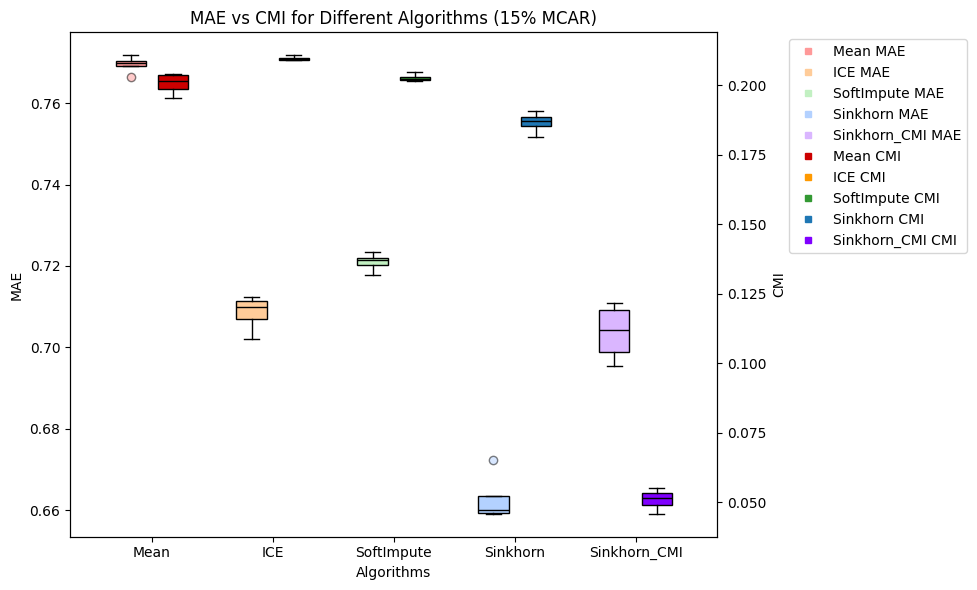

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar15 = {
    'Mean': mcar_mean_cmi15,
    'ICE': mcar_ice_cmi15,
    'SoftImpute': mcar_soft_cmi15,
    'Sinkhorn': mcar_sk_cmi15,
    'Sinkhorn_CMI': mcar_skCmi_cmi15
}
mae_data_mcar15 = {
    'Mean': mcar_mean_mae15,
    'ICE': mcar_ice_mae15,
    'SoftImpute': mcar_soft_mae15,
    'Sinkhorn': mcar_sk_mae15,
    'Sinkhorn_CMI': mcar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar15[algo]
    cmi_vals = cmi_data_mcar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae20, mcar_sk_cmi20, mcar_skCmi_mae20, mcar_skCmi_cmi20, mcar_mean_mae20, mcar_mean_cmi20, mcar_ice_mae20, mcar_ice_cmi20, mcar_soft_mae20, mcar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.8282
INFO:root:Iteration 0:	 Loss: 6.4820	 Validation MAE: 0.7885	RMSE: 1.0238
INFO:root:Iteration 50:	 Loss: 6.2694	 Validation MAE: 0.7188	RMSE: 1.0050
INFO:root:Iteration 100:	 Loss: 6.1838	 Validation MAE: 0.7059	RMSE: 0.9997
INFO:root:Iteration 150:	 Loss: 6.4741	 Validation MAE: 0.6995	RMSE: 0.9970
INFO:root:Iteration 200:	 Loss: 5.9653	 Validation MAE: 0.6944	RMSE: 0.9941
INFO:root:Iteration 250:	 Loss: 6.0855	 Validation MAE: 0.6922	RMSE: 0.9934
INFO:root:Iteration 300:	 Loss: 5.6869	 Validation MAE: 0.6906	RMSE: 0.9925
INFO:root:Iteration 350:	 Loss: 5.5997	 Validation MAE: 0.6895	RMSE: 0.9917
INFO:root:Iteration 400:	 Loss: 6.3262	 Validation MAE: 0.6885	RMSE: 0.9917
INFO:root:Iteration 450:	 Loss: 6.2309	 Validation MAE: 0.6901	RMSE: 0.9929
INFO:root:Iteration 500:	 Loss: 5.5984	 Validation MAE: 0.6895	RMSE: 0.9931
INFO:root:Iteration 550:	 Loss: 5.6602	 Validation MAE: 0.6882	RMSE: 0.9926
INFO:root:Iteration 600:	 Loss: 5.4615	 Validat

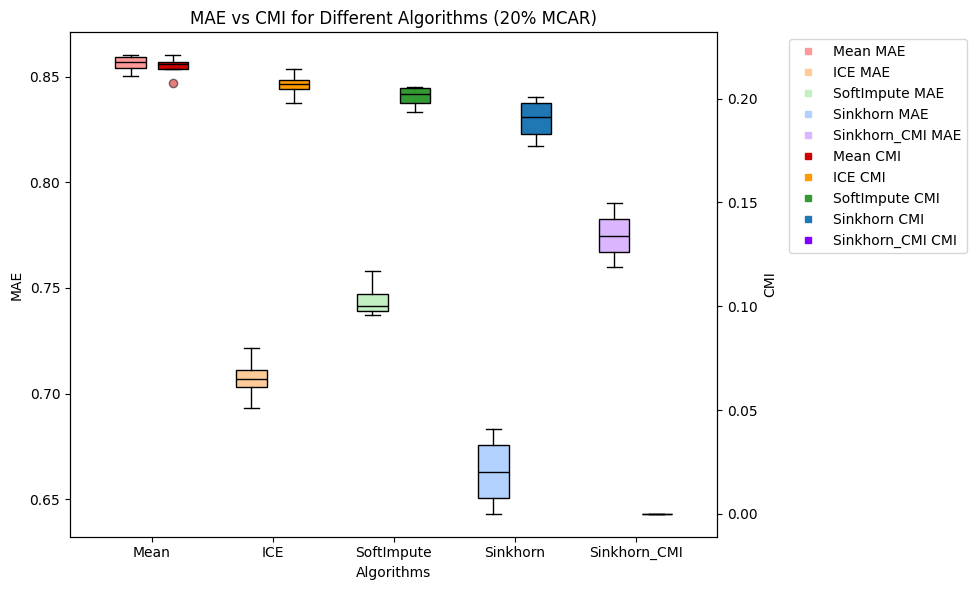

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar20 = {
    'Mean': mcar_mean_cmi20,
    'ICE': mcar_ice_cmi20,
    'SoftImpute': mcar_soft_cmi20,
    'Sinkhorn': mcar_sk_cmi20,
    'Sinkhorn_CMI': mcar_skCmi_cmi20
}
mae_data_mcar20 = {
    'Mean': mcar_mean_mae20,
    'ICE': mcar_ice_mae20,
    'SoftImpute': mcar_soft_mae20,
    'Sinkhorn': mcar_sk_mae20,
    'Sinkhorn_CMI': mcar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar20[algo]
    cmi_vals = cmi_data_mcar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae25, mcar_sk_cmi25, mcar_skCmi_mae25, mcar_skCmi_cmi25, mcar_mean_mae25, mcar_mean_cmi25, mcar_ice_mae25, mcar_ice_cmi25, mcar_soft_mae25, mcar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

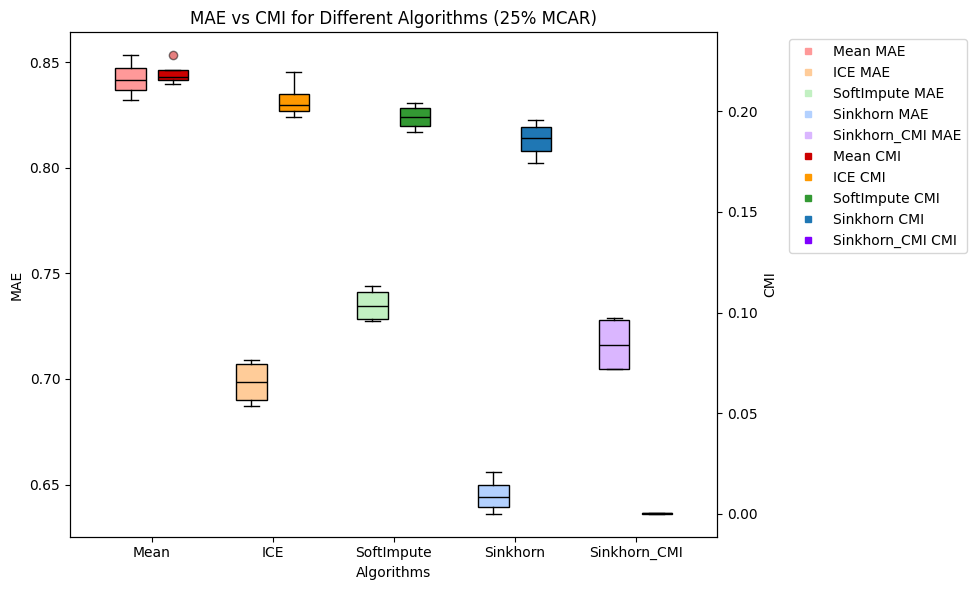

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar25 = {
    'Mean': mcar_mean_cmi25,
    'ICE': mcar_ice_cmi25,
    'SoftImpute': mcar_soft_cmi25,
    'Sinkhorn': mcar_sk_cmi25,
    'Sinkhorn_CMI': mcar_skCmi_cmi25
}
mae_data_mcar25 = {
    'Mean': mcar_mean_mae25,
    'ICE': mcar_ice_mae25,
    'SoftImpute': mcar_soft_mae25,
    'Sinkhorn': mcar_sk_mae25,
    'Sinkhorn_CMI': mcar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar25[algo]
    cmi_vals = cmi_data_mcar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MCAR

In [ ]:
cycle = 4
dependencies = None
missing_type = "MCAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mcar_sk_mae30, mcar_sk_cmi30, mcar_skCmi_mae30, mcar_skCmi_cmi30, mcar_mean_mae30, mcar_mean_cmi30, mcar_ice_mae30, mcar_ice_cmi30, mcar_soft_mae30, mcar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

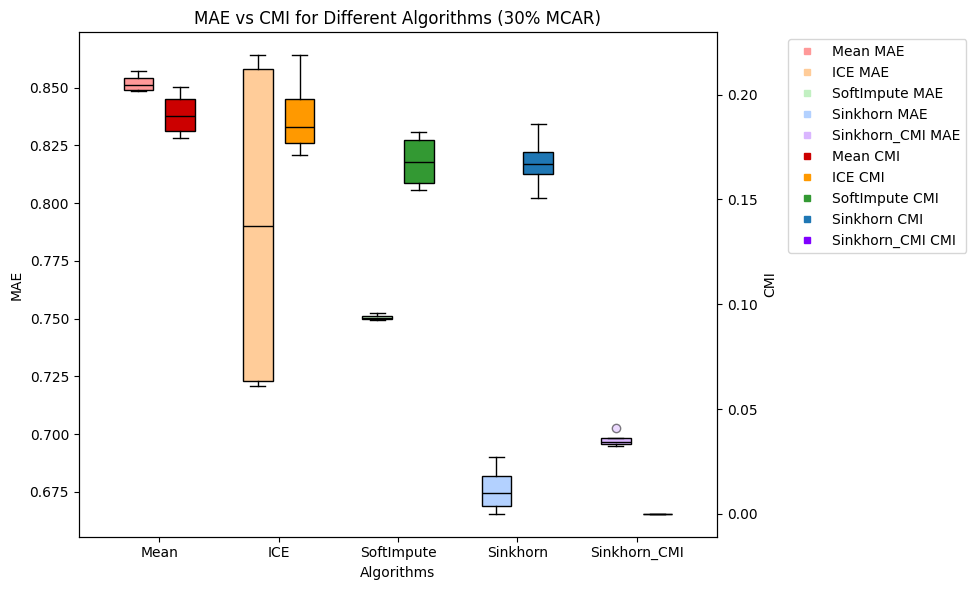

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mcar30 = {
    'Mean': mcar_mean_cmi30,
    'ICE': mcar_ice_cmi30,
    'SoftImpute': mcar_soft_cmi30,
    'Sinkhorn': mcar_sk_cmi30,
    'Sinkhorn_CMI': mcar_skCmi_cmi30
}
mae_data_mcar30 = {
    'Mean': mcar_mean_mae30,
    'ICE': mcar_ice_mae30,
    'SoftImpute': mcar_soft_mae30,
    'Sinkhorn': mcar_sk_mae30,
    'Sinkhorn_CMI': mcar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mcar30[algo]
    cmi_vals = cmi_data_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


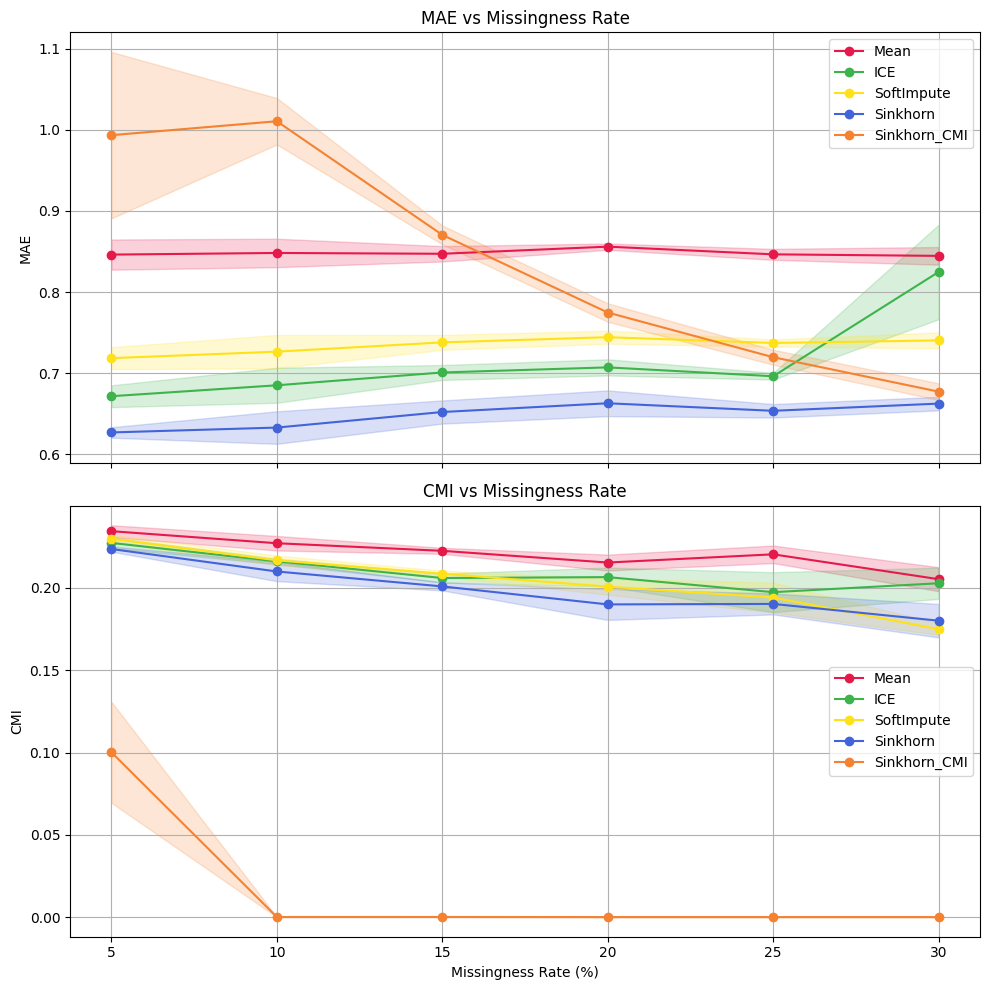

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mcar_mean_mae5, mcar_mean_mae10, mcar_mean_mae15, mcar_mean_mae20, mcar_mean_mae25, mcar_mean_mae30],
    'ICE': [mcar_ice_mae5, mcar_ice_mae10, mcar_ice_mae15, mcar_ice_mae20, mcar_ice_mae25, mcar_ice_mae30],
    'SoftImpute': [mcar_soft_mae5, mcar_soft_mae10, mcar_soft_mae15, mcar_soft_mae20, mcar_soft_mae25, mcar_soft_mae30],
    'Sinkhorn': [mcar_sk_mae5, mcar_sk_mae10, mcar_sk_mae15, mcar_sk_mae20, mcar_sk_mae25, mcar_sk_mae30],
    'Sinkhorn_CMI': [mcar_skCmi_mae5, mcar_skCmi_mae10, mcar_skCmi_mae15, mcar_skCmi_mae20, mcar_skCmi_mae25, mcar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mcar_mean_cmi5, mcar_mean_cmi10, mcar_mean_cmi15, mcar_mean_cmi20, mcar_mean_cmi25, mcar_mean_cmi30],
    'ICE': [mcar_ice_cmi5, mcar_ice_cmi10, mcar_ice_cmi15, mcar_ice_cmi20, mcar_ice_cmi25, mcar_ice_cmi30],
    'SoftImpute': [mcar_soft_cmi5, mcar_soft_cmi10, mcar_soft_cmi15, mcar_soft_cmi20, mcar_soft_cmi25, mcar_soft_cmi30],
    'Sinkhorn': [mcar_sk_cmi5, mcar_sk_cmi10, mcar_sk_cmi15, mcar_sk_cmi20, mcar_sk_cmi25, mcar_sk_cmi30],
    'Sinkhorn_CMI': [mcar_skCmi_cmi5, mcar_skCmi_cmi10, mcar_skCmi_cmi15, mcar_skCmi_cmi20, mcar_skCmi_cmi25, mcar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MAR

### 5% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mar_sk_mae5, mar_sk_cmi5, mar_skCmi_mae5, mar_skCmi_cmi5, mar_mean_mae5, mar_mean_cmi5, mar_ice_mae5, mar_ice_cmi5, mar_soft_mae5, mar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar5 = {
    'Mean': mar_mean_cmi5,
    'ICE': mar_ice_cmi5,
    'SoftImpute': mar_soft_cmi5,
    'Sinkhorn': mar_sk_cmi5,
    'Sinkhorn_CMI': mar_skCmi_cmi5
}
mae_data_mar5 = {
    'Mean': mar_mean_mae5,
    'ICE': mar_ice_mae5,
    'SoftImpute': mar_soft_mae5,
    'Sinkhorn': mar_sk_mae5,
    'Sinkhorn_CMI': mar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar5[algo]
    cmi_vals = cmi_data_mar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae10, mar_sk_cmi10, mar_skCmi_mae10, mar_skCmi_cmi10, mar_mean_mae10, mar_mean_cmi10, mar_ice_mae10, mar_ice_cmi10, mar_soft_mae10, mar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

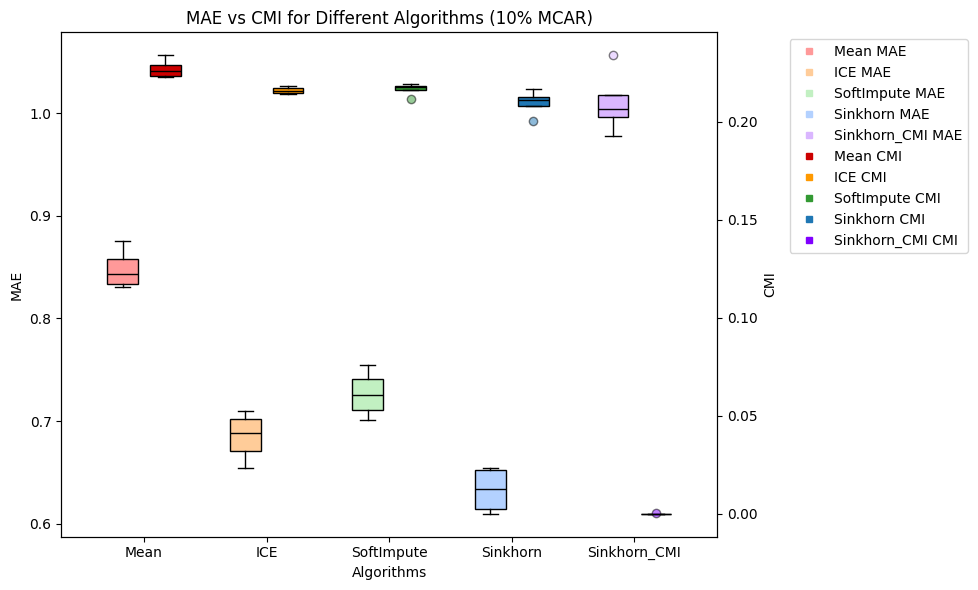

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar10 = {
    'Mean': mar_mean_cmi10,
    'ICE': mar_ice_cmi10,
    'SoftImpute': mar_soft_cmi10,
    'Sinkhorn': mar_sk_cmi10,
    'Sinkhorn_CMI': mar_skCmi_cmi10
}
mae_data_mar10 = {
    'Mean': mar_mean_mae10,
    'ICE': mar_ice_mae10,
    'SoftImpute': mar_soft_mae10,
    'Sinkhorn': mar_sk_mae10,
    'Sinkhorn_CMI': mar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar10[algo]
    cmi_vals = cmi_data_mar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae15, mar_sk_cmi15, mar_skCmi_mae15, mar_skCmi_cmi15, mar_mean_mae15, mar_mean_cmi15, mar_ice_mae15, mar_ice_cmi15, mar_soft_mae15, mar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

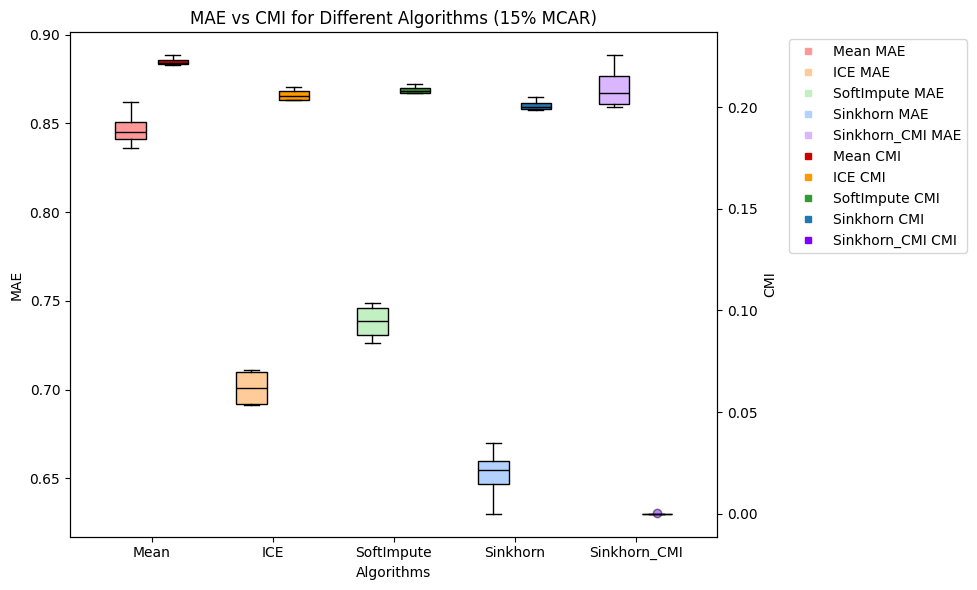

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar15 = {
    'Mean': mar_mean_cmi15,
    'ICE': mar_ice_cmi15,
    'SoftImpute': mar_soft_cmi15,
    'Sinkhorn': mar_sk_cmi15,
    'Sinkhorn_CMI': mar_skCmi_cmi15
}
mae_data_mar15 = {
    'Mean': mar_mean_mae15,
    'ICE': mar_ice_mae15,
    'SoftImpute': mar_soft_mae15,
    'Sinkhorn': mar_sk_mae15,
    'Sinkhorn_CMI': mar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar15[algo]
    cmi_vals = cmi_data_mar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae20, mar_sk_cmi20, mar_skCmi_mae20, mar_skCmi_cmi20, mar_mean_mae20, mar_mean_cmi20, mar_ice_mae20, mar_ice_cmi20, mar_soft_mae20, mar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

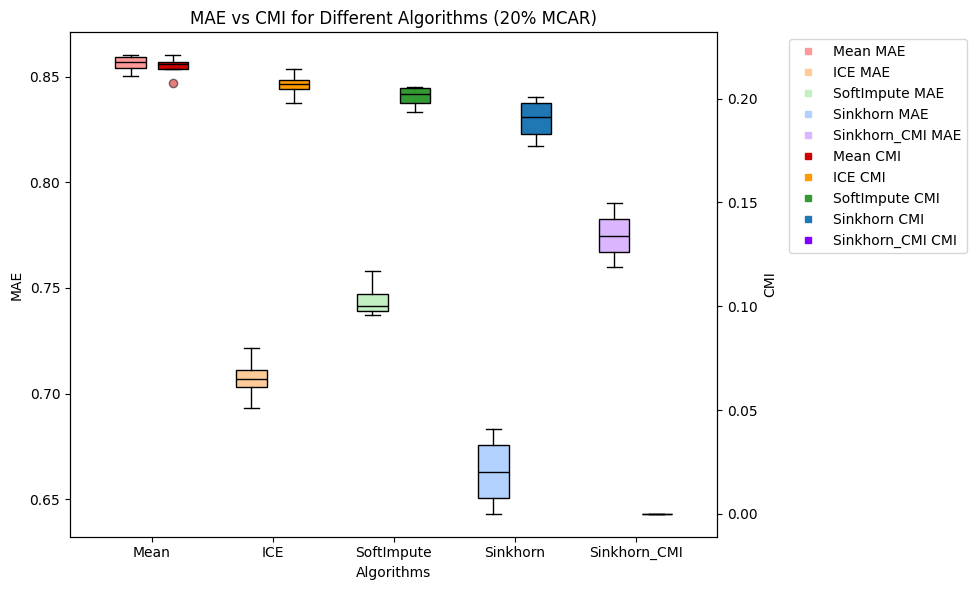

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar20 = {
    'Mean': mar_mean_cmi20,
    'ICE': mar_ice_cmi20,
    'SoftImpute': mar_soft_cmi20,
    'Sinkhorn': mar_sk_cmi20,
    'Sinkhorn_CMI': mar_skCmi_cmi20
}
mae_data_mar20 = {
    'Mean': mar_mean_mae20,
    'ICE': mar_ice_mae20,
    'SoftImpute': mar_soft_mae20,
    'Sinkhorn': mar_sk_mae20,
    'Sinkhorn_CMI': mar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar20[algo]
    cmi_vals = cmi_data_mar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae25, mar_sk_cmi25, mar_skCmi_mae25, mar_skCmi_cmi25, mar_mean_mae25, mar_mean_cmi25, mar_ice_mae25, mar_ice_cmi25, mar_soft_mae25, mar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

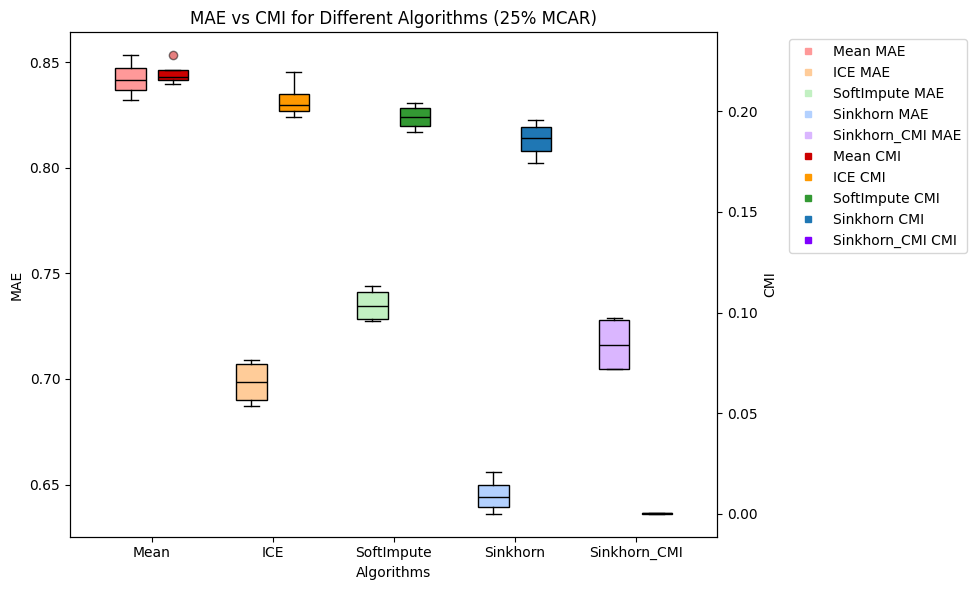

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar25 = {
    'Mean': mar_mean_cmi25,
    'ICE': mar_ice_cmi25,
    'SoftImpute': mar_soft_cmi25,
    'Sinkhorn': mar_sk_cmi25,
    'Sinkhorn_CMI': mar_skCmi_cmi25
}
mae_data_mar25 = {
    'Mean': mar_mean_mae25,
    'ICE': mar_ice_mae25,
    'SoftImpute': mar_soft_mae25,
    'Sinkhorn': mar_sk_mae25,
    'Sinkhorn_CMI': mar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar25[algo]
    cmi_vals = cmi_data_mar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MAR

In [ ]:
cycle = 4
dependencies = dependencies_mar
missing_type = "MAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mar_sk_mae30, mar_sk_cmi30, mar_skCmi_mae30, mar_skCmi_cmi30, mar_mean_mae30, mar_mean_cmi30, mar_ice_mae30, mar_ice_cmi30, mar_soft_mae30, mar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

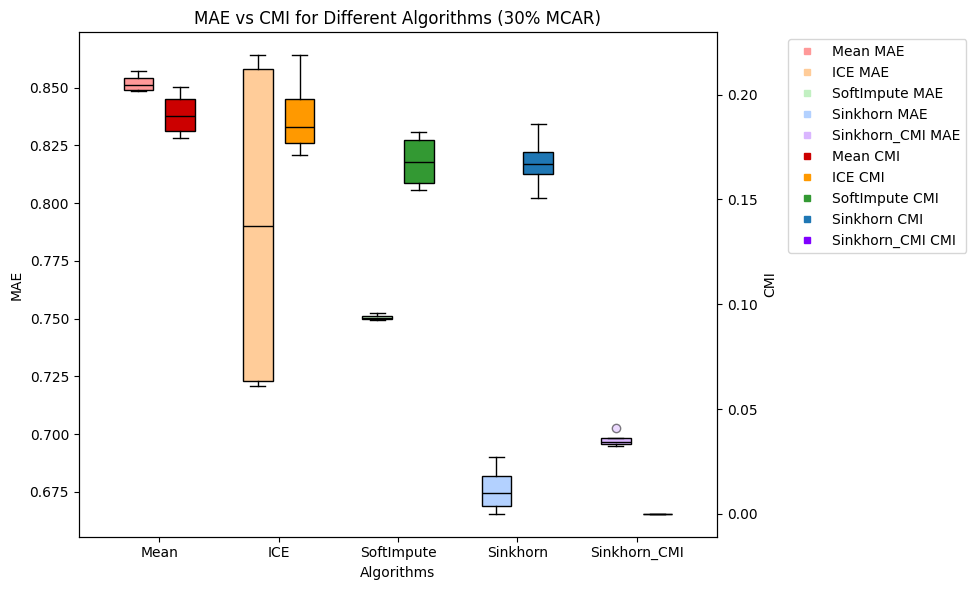

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mar30 = {
    'Mean': mar_mean_cmi30,
    'ICE': mar_ice_cmi30,
    'SoftImpute': mar_soft_cmi30,
    'Sinkhorn': mar_sk_cmi30,
    'Sinkhorn_CMI': mar_skCmi_cmi30
}
mae_data_mar30 = {
    'Mean': mar_mean_mae30,
    'ICE': mar_ice_mae30,
    'SoftImpute': mar_soft_mae30,
    'Sinkhorn': mar_sk_mae30,
    'Sinkhorn_CMI': mar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mar30[algo]
    cmi_vals = cmi_data_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


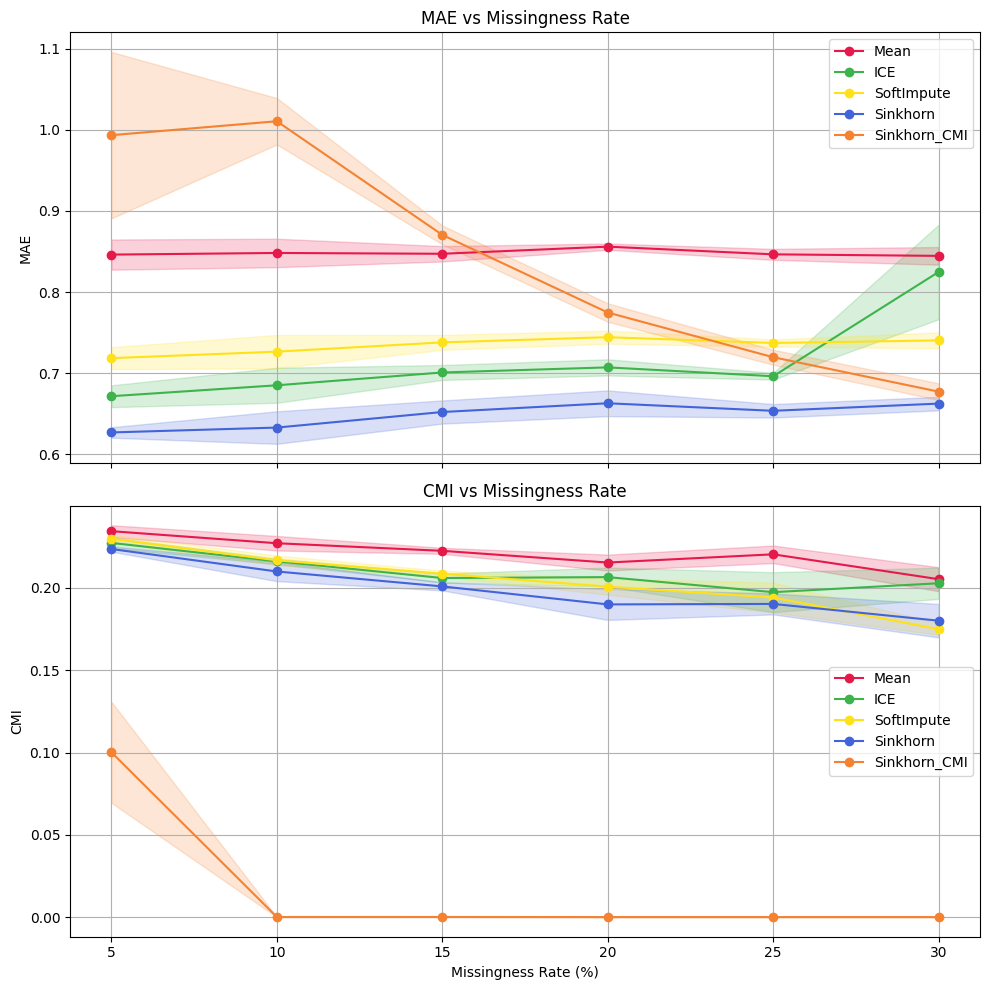

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mar_mean_mae5, mar_mean_mae10, mar_mean_mae15, mar_mean_mae20, mar_mean_mae25, mar_mean_mae30],
    'ICE': [mar_ice_mae5, mar_ice_mae10, mar_ice_mae15, mar_ice_mae20, mar_ice_mae25, mar_ice_mae30],
    'SoftImpute': [mar_soft_mae5, mar_soft_mae10, mar_soft_mae15, mar_soft_mae20, mar_soft_mae25, mar_soft_mae30],
    'Sinkhorn': [mar_sk_mae5, mar_sk_mae10, mar_sk_mae15, mar_sk_mae20, mar_sk_mae25, mar_sk_mae30],
    'Sinkhorn_CMI': [mar_skCmi_mae5, mar_skCmi_mae10, mar_skCmi_mae15, mar_skCmi_mae20, mar_skCmi_mae25, mar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mar_mean_cmi5, mar_mean_cmi10, mar_mean_cmi15, mar_mean_cmi20, mar_mean_cmi25, mar_mean_cmi30],
    'ICE': [mar_ice_cmi5, mar_ice_cmi10, mar_ice_cmi15, mar_ice_cmi20, mar_ice_cmi25, mar_ice_cmi30],
    'SoftImpute': [mar_soft_cmi5, mar_soft_cmi10, mar_soft_cmi15, mar_soft_cmi20, mar_soft_cmi25, mar_soft_cmi30],
    'Sinkhorn': [mar_sk_cmi5, mar_sk_cmi10, mar_sk_cmi15, mar_sk_cmi20, mar_sk_cmi25, mar_sk_cmi30],
    'Sinkhorn_CMI': [mar_skCmi_cmi5, mar_skCmi_cmi10, mar_skCmi_cmi15, mar_skCmi_cmi20, mar_skCmi_cmi25, mar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate MAR (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MNAR

### 5% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 5
highest_lamda_cmi = 15
niter = 5000

mnar_sk_mae5, mnar_sk_cmi5, mnar_skCmi_mae5, mnar_skCmi_cmi5, mnar_mean_mae5, mnar_mean_cmi5, mnar_ice_mae5, mnar_ice_cmi5, mnar_soft_mae5,  mnar_soft_cmi5 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5471
INFO:root:Iteration 0:	 Loss: 2.5363	 Validation MAE: 0.8500	RMSE: 1.0160
INFO:root:Iteration 50:	 Loss: 2.5270	 Validation MAE: 0.7527	RMSE: 0.9762
INFO:root:Iteration 100:	 Loss: 2.5225	 Validation MAE: 0.7199	RMSE: 0.9624
INFO:root:Iteration 150:	 Loss: 2.6113	 Validation MAE: 0.6950	RMSE: 0.9496
INFO:root:Iteration 200:	 Loss: 2.5113	 Validation MAE: 0.6853	RMSE: 0.9488
INFO:root:Iteration 250:	 Loss: 2.6707	 Validation MAE: 0.6739	RMSE: 0.9457
INFO:root:Iteration 300:	 Loss: 2.3179	 Validation MAE: 0.6694	RMSE: 0.9458
INFO:root:Iteration 350:	 Loss: 2.4568	 Validation MAE: 0.6623	RMSE: 0.9459
INFO:root:Iteration 400:	 Loss: 3.1045	 Validation MAE: 0.6543	RMSE: 0.9414
INFO:root:Iteration 450:	 Loss: 2.3202	 Validation MAE: 0.6496	RMSE: 0.9351
INFO:root:Iteration 500:	 Loss: 2.3357	 Validation MAE: 0.6479	RMSE: 0.9359
INFO:root:Iteration 550:	 Loss: 2.5682	 Validation MAE: 0.6459	RMSE: 0.9372
INFO:root:Iteration 600:	 Loss: 2.4206	 Validat

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar5 = {
    'Mean': mnar_mean_cmi5,
    'ICE': mnar_ice_cmi5,
    'SoftImpute': mnar_soft_cmi5,
    'Sinkhorn': mnar_sk_cmi5,
    'Sinkhorn_CMI': mnar_skCmi_cmi5
}
mae_data_mnar5 = {
    'Mean': mnar_mean_mae5,
    'ICE': mnar_ice_mae5,
    'SoftImpute': mnar_soft_mae5,
    'Sinkhorn': mnar_sk_mae5,
    'Sinkhorn_CMI': mnar_skCmi_mae5
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar5[algo]
    cmi_vals = cmi_data_mnar5[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (5% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

### 10% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 10
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae10, mnar_sk_cmi10, mnar_skCmi_mae10, mnar_skCmi_cmi10, mnar_mean_mae10, mnar_mean_cmi10, mnar_ice_mae10, mnar_ice_cmi10, mnar_soft_mae10, mnar_soft_cmi10 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.5221
INFO:root:Iteration 0:	 Loss: 2.5271	 Validation MAE: 0.8781	RMSE: 1.0560
INFO:root:Iteration 50:	 Loss: 2.2761	 Validation MAE: 0.7727	RMSE: 1.0074
INFO:root:Iteration 100:	 Loss: 2.4283	 Validation MAE: 0.7362	RMSE: 0.9919
INFO:root:Iteration 150:	 Loss: 2.2363	 Validation MAE: 0.7174	RMSE: 0.9874
INFO:root:Iteration 200:	 Loss: 2.5400	 Validation MAE: 0.7016	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 2.4012	 Validation MAE: 0.6914	RMSE: 0.9786
INFO:root:Iteration 300:	 Loss: 2.2598	 Validation MAE: 0.6838	RMSE: 0.9752
INFO:root:Iteration 350:	 Loss: 2.3362	 Validation MAE: 0.6745	RMSE: 0.9715
INFO:root:Iteration 400:	 Loss: 2.1902	 Validation MAE: 0.6716	RMSE: 0.9710
INFO:root:Iteration 450:	 Loss: 2.2093	 Validation MAE: 0.6664	RMSE: 0.9683
INFO:root:Iteration 500:	 Loss: 2.0970	 Validation MAE: 0.6621	RMSE: 0.9652
INFO:root:Iteration 550:	 Loss: 2.2531	 Validation MAE: 0.6634	RMSE: 0.9681
INFO:root:Iteration 600:	 Loss: 2.1888	 Validat

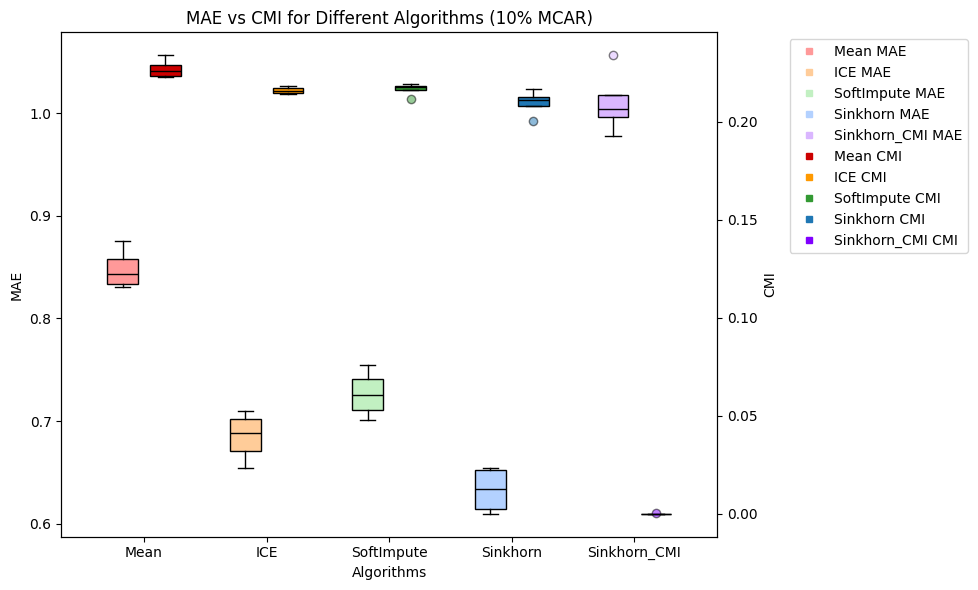

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar10 = {
    'Mean': mnar_mean_cmi10,
    'ICE': mnar_ice_cmi10,
    'SoftImpute': mnar_soft_cmi10,
    'Sinkhorn': mnar_sk_cmi10,
    'Sinkhorn_CMI': mnar_skCmi_cmi10
}
mae_data_mnar10 = {
    'Mean': mnar_mean_mae10,
    'ICE': mnar_ice_mae10,
    'SoftImpute': mnar_soft_mae10,
    'Sinkhorn': mnar_sk_mae10,
    'Sinkhorn_CMI': mnar_skCmi_mae10
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar10[algo]
    cmi_vals = cmi_data_mnar10[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (10% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 15% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 15
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae15, mnar_sk_cmi15, mnar_skCmi_mae15, mnar_skCmi_cmi15, mnar_mean_mae15, mnar_mean_cmi15, mnar_ice_mae15, mnar_ice_cmi15, mnar_soft_mae15, mnar_soft_cmi15 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4912
INFO:root:Iteration 0:	 Loss: 2.3263	 Validation MAE: 0.8430	RMSE: 1.0001
INFO:root:Iteration 50:	 Loss: 2.2554	 Validation MAE: 0.7537	RMSE: 0.9683
INFO:root:Iteration 100:	 Loss: 2.1644	 Validation MAE: 0.7223	RMSE: 0.9587
INFO:root:Iteration 150:	 Loss: 2.1129	 Validation MAE: 0.7047	RMSE: 0.9549
INFO:root:Iteration 200:	 Loss: 2.2498	 Validation MAE: 0.6947	RMSE: 0.9549
INFO:root:Iteration 250:	 Loss: 2.3506	 Validation MAE: 0.6846	RMSE: 0.9502
INFO:root:Iteration 300:	 Loss: 2.3762	 Validation MAE: 0.6805	RMSE: 0.9491
INFO:root:Iteration 350:	 Loss: 2.2683	 Validation MAE: 0.6780	RMSE: 0.9505
INFO:root:Iteration 400:	 Loss: 2.1121	 Validation MAE: 0.6742	RMSE: 0.9512
INFO:root:Iteration 450:	 Loss: 2.0293	 Validation MAE: 0.6711	RMSE: 0.9531
INFO:root:Iteration 500:	 Loss: 1.9154	 Validation MAE: 0.6678	RMSE: 0.9527
INFO:root:Iteration 550:	 Loss: 2.2961	 Validation MAE: 0.6696	RMSE: 0.9558
INFO:root:Iteration 600:	 Loss: 2.2112	 Validat

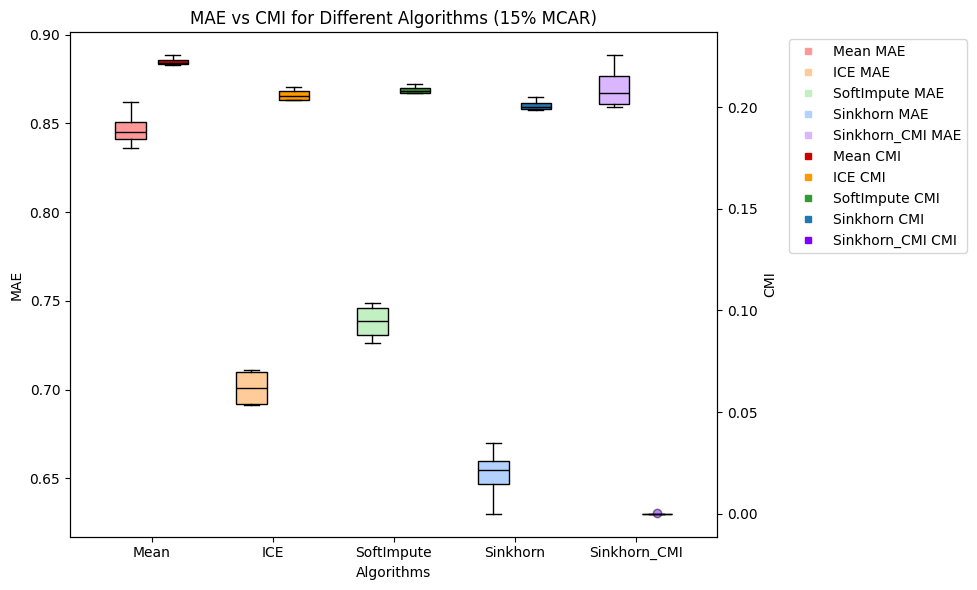

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar15 = {
    'Mean': mnar_mean_cmi15,
    'ICE': mnar_ice_cmi15,
    'SoftImpute': mnar_soft_cmi15,
    'Sinkhorn': mnar_sk_cmi15,
    'Sinkhorn_CMI': mnar_skCmi_cmi15
}
mae_data_mnar15 = {
    'Mean': mnar_mean_mae15,
    'ICE': mnar_ice_mae15,
    'SoftImpute': mnar_soft_mae15,
    'Sinkhorn': mnar_sk_mae15,
    'Sinkhorn_CMI': mnar_skCmi_mae15
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar15[algo]
    cmi_vals = cmi_data_mnar15[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (15% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 20% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 20
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae20, mnar_sk_cmi20, mnar_skCmi_mae20, mnar_skCmi_cmi20, mnar_mean_mae20, mnar_mean_cmi20, mnar_ice_mae20, mnar_ice_cmi20, mnar_soft_mae20, mnar_soft_cmi20 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4633
INFO:root:Iteration 0:	 Loss: 2.6567	 Validation MAE: 0.8531	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 2.0398	 Validation MAE: 0.7599	RMSE: 0.9735
INFO:root:Iteration 100:	 Loss: 2.0552	 Validation MAE: 0.7289	RMSE: 0.9665
INFO:root:Iteration 150:	 Loss: 1.9240	 Validation MAE: 0.7126	RMSE: 0.9637
INFO:root:Iteration 200:	 Loss: 2.1285	 Validation MAE: 0.6986	RMSE: 0.9621
INFO:root:Iteration 250:	 Loss: 2.0264	 Validation MAE: 0.6875	RMSE: 0.9557
INFO:root:Iteration 300:	 Loss: 1.9867	 Validation MAE: 0.6799	RMSE: 0.9551
INFO:root:Iteration 350:	 Loss: 2.2002	 Validation MAE: 0.6740	RMSE: 0.9539
INFO:root:Iteration 400:	 Loss: 1.9239	 Validation MAE: 0.6739	RMSE: 0.9562
INFO:root:Iteration 450:	 Loss: 1.9685	 Validation MAE: 0.6706	RMSE: 0.9567
INFO:root:Iteration 500:	 Loss: 2.0511	 Validation MAE: 0.6688	RMSE: 0.9559
INFO:root:Iteration 550:	 Loss: 2.2345	 Validation MAE: 0.6661	RMSE: 0.9552
INFO:root:Iteration 600:	 Loss: 2.0395	 Validat

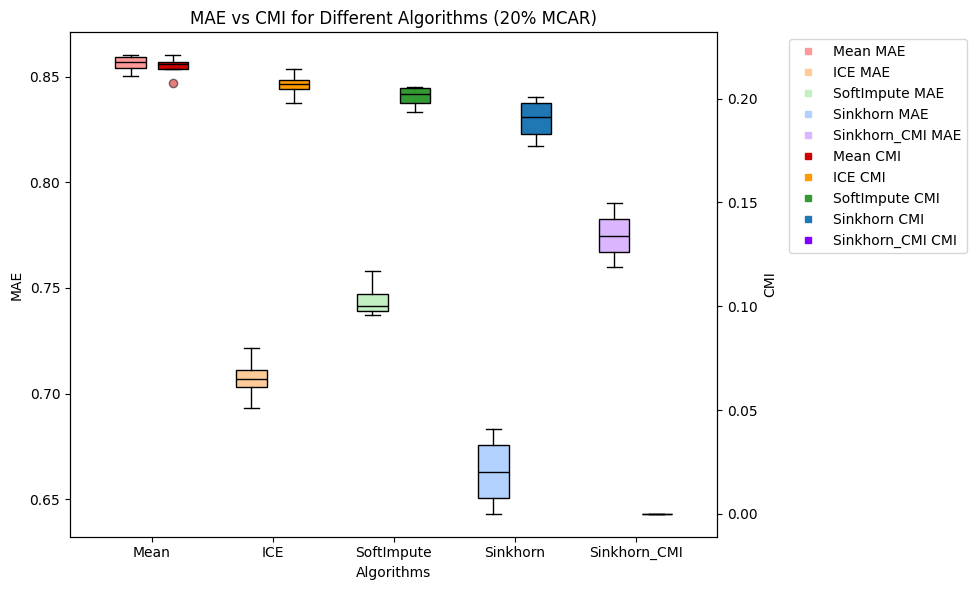

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar20 = {
    'Mean': mnar_mean_cmi20,
    'ICE': mnar_ice_cmi20,
    'SoftImpute': mnar_soft_cmi20,
    'Sinkhorn': mnar_sk_cmi20,
    'Sinkhorn_CMI': mnar_skCmi_cmi20
}
mae_data_mnar20 = {
    'Mean': mnar_mean_mae20,
    'ICE': mnar_ice_mae20,
    'SoftImpute': mnar_soft_mae20,
    'Sinkhorn': mnar_sk_mae20,
    'Sinkhorn_CMI': mnar_skCmi_mae20
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar20[algo]
    cmi_vals = cmi_data_mnar20[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (20% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 25% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 25
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae25, mnar_sk_cmi25, mnar_skCmi_mae25, mnar_skCmi_cmi25, mnar_mean_mae25, mnar_mean_cmi25, mnar_ice_mae25, mnar_ice_cmi25, mnar_soft_mae25, mnar_soft_cmi25 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4401
INFO:root:Iteration 0:	 Loss: 2.1551	 Validation MAE: 0.8512	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.3569	 Validation MAE: 0.7668	RMSE: 0.9836
INFO:root:Iteration 100:	 Loss: 1.8705	 Validation MAE: 0.7347	RMSE: 0.9738
INFO:root:Iteration 150:	 Loss: 2.0333	 Validation MAE: 0.7132	RMSE: 0.9683
INFO:root:Iteration 200:	 Loss: 2.0180	 Validation MAE: 0.6978	RMSE: 0.9650
INFO:root:Iteration 250:	 Loss: 2.0146	 Validation MAE: 0.6875	RMSE: 0.9634
INFO:root:Iteration 300:	 Loss: 1.8338	 Validation MAE: 0.6820	RMSE: 0.9630
INFO:root:Iteration 350:	 Loss: 1.9957	 Validation MAE: 0.6746	RMSE: 0.9600
INFO:root:Iteration 400:	 Loss: 2.0228	 Validation MAE: 0.6703	RMSE: 0.9587
INFO:root:Iteration 450:	 Loss: 2.0789	 Validation MAE: 0.6678	RMSE: 0.9585
INFO:root:Iteration 500:	 Loss: 1.6837	 Validation MAE: 0.6632	RMSE: 0.9560
INFO:root:Iteration 550:	 Loss: 2.1854	 Validation MAE: 0.6614	RMSE: 0.9567
INFO:root:Iteration 600:	 Loss: 1.5866	 Validat

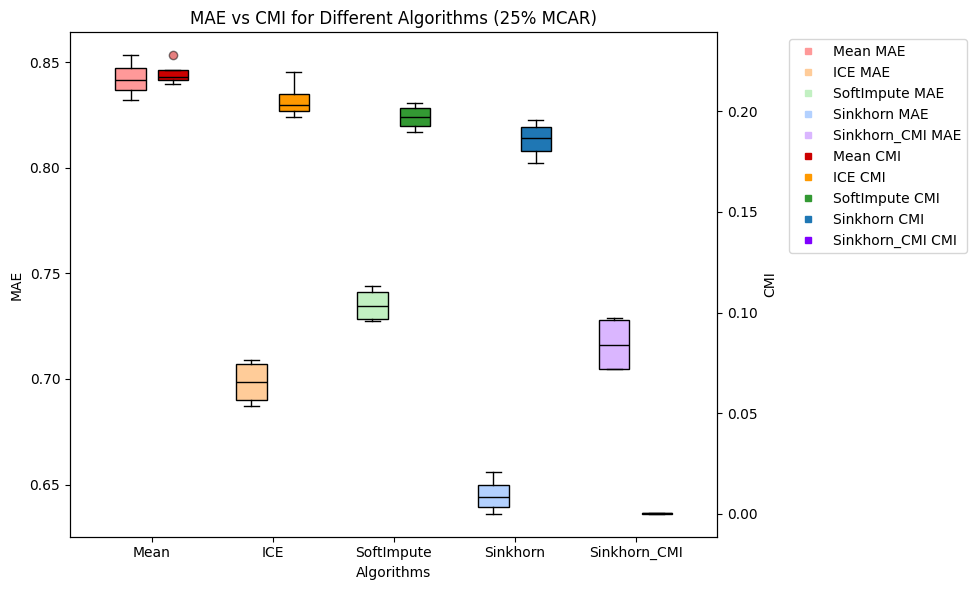

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar25 = {
    'Mean': mnar_mean_cmi25,
    'ICE': mnar_ice_cmi25,
    'SoftImpute': mnar_soft_cmi25,
    'Sinkhorn': mnar_sk_cmi25,
    'Sinkhorn_CMI': mnar_skCmi_cmi25
}
mae_data_mnar25 = {
    'Mean': mnar_mean_mae25,
    'ICE': mnar_ice_mae25,
    'SoftImpute': mnar_soft_mae25,
    'Sinkhorn': mnar_sk_mae25,
    'Sinkhorn_CMI': mnar_skCmi_mae25
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar25[algo]
    cmi_vals = cmi_data_mnar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (25% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### 30% MNAR

In [ ]:
cycle = 4
dependencies = dependencies_mnar
missing_type = "MNAR"
missing_rate = 30
highest_lamda_cmi = 15
niter = 5000
mnar_sk_mae30, mnar_sk_cmi30, mnar_skCmi_mae30, mnar_skCmi_cmi30, mnar_mean_mae30, mnar_mean_cmi30, mnar_ice_mae30, mnar_ice_cmi30, mnar_soft_mae30, mnar_soft_cmi30 = run(groundTruth_tensor, X, Y, cycle, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter,bucket_specs, X_cols, Y_cols, Z_cols)

INFO:root:batchsize = 128, epsilon = 0.4101
INFO:root:Iteration 0:	 Loss: 2.1431	 Validation MAE: 0.8581	RMSE: 1.0108
INFO:root:Iteration 50:	 Loss: 2.2576	 Validation MAE: 0.7654	RMSE: 0.9772
INFO:root:Iteration 100:	 Loss: 1.9420	 Validation MAE: 0.7318	RMSE: 0.9677
INFO:root:Iteration 150:	 Loss: 1.7966	 Validation MAE: 0.7117	RMSE: 0.9635
INFO:root:Iteration 200:	 Loss: 2.3071	 Validation MAE: 0.6977	RMSE: 0.9607
INFO:root:Iteration 250:	 Loss: 1.8645	 Validation MAE: 0.6890	RMSE: 0.9610
INFO:root:Iteration 300:	 Loss: 2.0195	 Validation MAE: 0.6845	RMSE: 0.9618
INFO:root:Iteration 350:	 Loss: 1.7765	 Validation MAE: 0.6803	RMSE: 0.9611
INFO:root:Iteration 400:	 Loss: 1.9048	 Validation MAE: 0.6751	RMSE: 0.9601
INFO:root:Iteration 450:	 Loss: 2.1189	 Validation MAE: 0.6713	RMSE: 0.9604
INFO:root:Iteration 500:	 Loss: 2.0664	 Validation MAE: 0.6687	RMSE: 0.9599
INFO:root:Iteration 550:	 Loss: 1.9812	 Validation MAE: 0.6662	RMSE: 0.9599
INFO:root:Iteration 600:	 Loss: 2.0450	 Validat

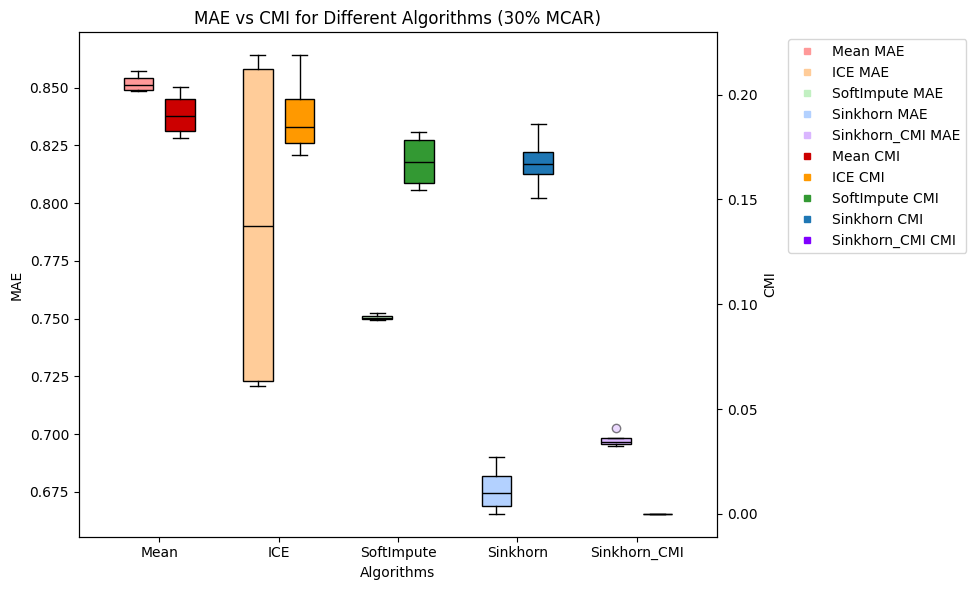

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
cmi_data_mnar30 = {
    'Mean': mnar_mean_cmi30,
    'ICE': mnar_ice_cmi30,
    'SoftImpute': mnar_soft_cmi30,
    'Sinkhorn': mnar_sk_cmi30,
    'Sinkhorn_CMI': mnar_skCmi_cmi30
}
mae_data_mnar30 = {
    'Mean': mnar_mean_mae30,
    'ICE': mnar_ice_mae30,
    'SoftImpute': mnar_soft_mae30,
    'Sinkhorn': mnar_sk_mae30,
    'Sinkhorn_CMI': mnar_skCmi_mae30
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    mae_vals = mae_data_mnar30[algo]
    cmi_vals = cmi_data_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(mae_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(cmi_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('MAE', color='black')
ax2.set_ylabel('CMI', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MAE vs CMI for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} MAE')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} CMI')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


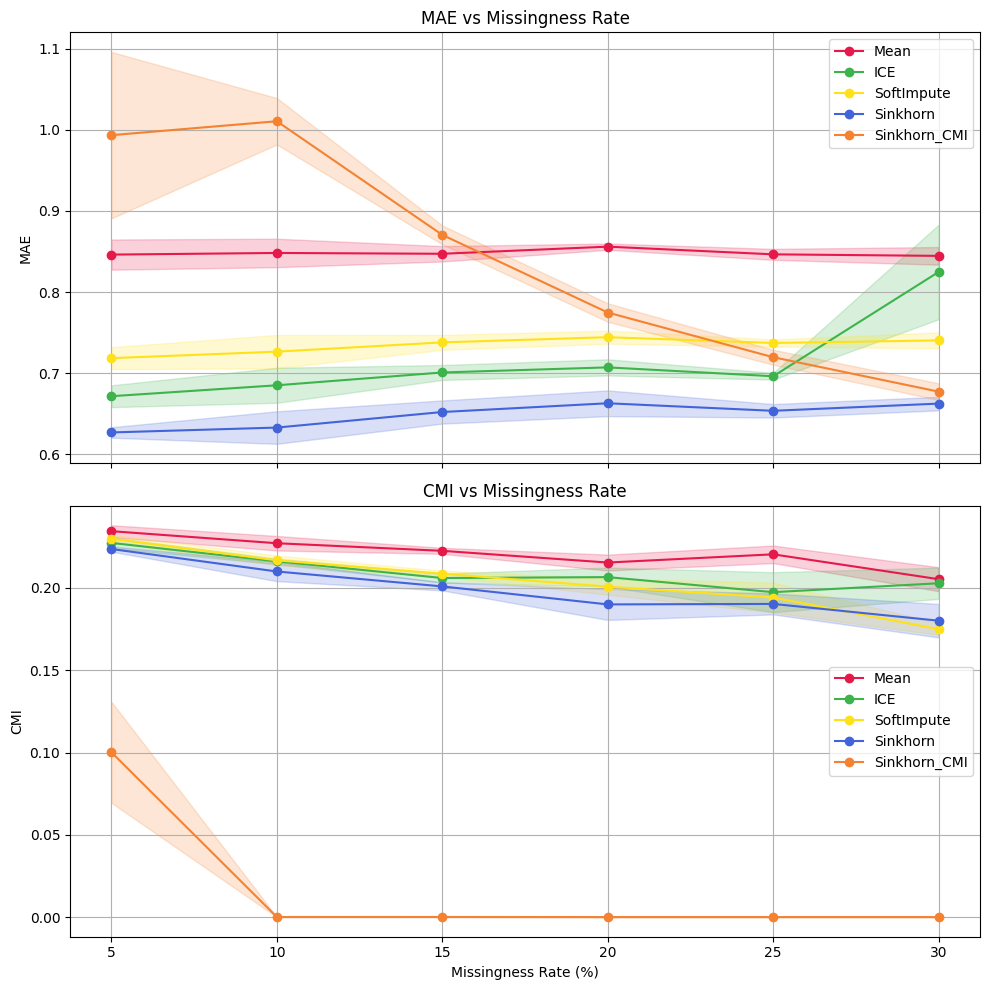

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5, 10, 15, 20, 25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
mae_results = {
    'Mean': [mnar_mean_mae5, mnar_mean_mae10, mnar_mean_mae15, mnar_mean_mae20, mnar_mean_mae25, mnar_mean_mae30],
    'ICE': [mnar_ice_mae5, mnar_ice_mae10, mnar_ice_mae15, mnar_ice_mae20, mnar_ice_mae25, mnar_ice_mae30],
    'SoftImpute': [mnar_soft_mae5, mnar_soft_mae10, mnar_soft_mae15, mnar_soft_mae20, mnar_soft_mae25, mnar_soft_mae30],
    'Sinkhorn': [mnar_sk_mae5, mnar_sk_mae10, mnar_sk_mae15, mnar_sk_mae20, mnar_sk_mae25, mnar_sk_mae30],
    'Sinkhorn_CMI': [mnar_skCmi_mae5, mnar_skCmi_mae10, mnar_skCmi_mae15, mnar_skCmi_mae20, mnar_skCmi_mae25, mnar_skCmi_mae30]
}

cmi_results = {
    'Mean': [mnar_mean_cmi5, mnar_mean_cmi10, mnar_mean_cmi15, mnar_mean_cmi20, mnar_mean_cmi25, mnar_mean_cmi30],
    'ICE': [mnar_ice_cmi5, mnar_ice_cmi10, mnar_ice_cmi15, mnar_ice_cmi20, mnar_ice_cmi25, mnar_ice_cmi30],
    'SoftImpute': [mnar_soft_cmi5, mnar_soft_cmi10, mnar_soft_cmi15, mnar_soft_cmi20, mnar_soft_cmi25, mnar_soft_cmi30],
    'Sinkhorn': [mnar_sk_cmi5, mnar_sk_cmi10, mnar_sk_cmi15, mnar_sk_cmi20, mnar_sk_cmi25, mnar_sk_cmi30],
    'Sinkhorn_CMI': [mnar_skCmi_cmi5, mnar_skCmi_cmi10, mnar_skCmi_cmi15, mnar_skCmi_cmi20, mnar_skCmi_cmi25, mnar_skCmi_cmi30]
}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# --- MAE plot ---
for i, algo in enumerate(algorithms):
    data = np.array(mae_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('MAE')
ax1.set_title('MAE vs Missingness Rate')
ax1.grid(True)
ax1.legend()

# --- CMI plot ---
for i, algo in enumerate(algorithms):
    data = np.array(cmi_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax2.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax2.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax2.set_xlabel('Missingness Rate (%)')
ax2.set_ylabel('CMI')
ax2.set_title('CMI vs Missingness Rate')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


### MCAR IAPD 

In [20]:
groundTruth_scaled_numpy = groundTruth_scaled.to_numpy()
protected_attr = groundTruth_scaled_numpy[:,1]
protected_attr  = (protected_attr > 0).astype(int)
groundTruth_scaled_numpy[:,1] = protected_attr

5% MCAR 

In [21]:

missing_type = "MCAR"
missing_rate = 5
dependencies = None
highest_lamda_cmi = 25
niter = 5000
sk_iapd5 = []
sk_cmi_iapd5 = []
mean_iapd5 = []
ice_iapd5 = []
soft_iapd5 = []


for i in range(0,4):
    sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap5, sk_cmi_iap5, mean_iap5, ice_iap5, soft_iap5 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data5, sk_cmi_imp_data5, mean_imp_data5, ice_imp_data5, soft_imp_data5 )

    
    sk_iapd5.append(sk_iap5)

    
    sk_cmi_iapd5.append(sk_cmi_iap5)

   
    mean_iapd5.append(mean_iap5)

    
    ice_iapd5.append(ice_iap5)


    soft_iapd5.append(soft_iap5)
    


INFO:root:batchsize = 128, epsilon = 0.9894
INFO:root:Iteration 0:	 Loss: 7.0057
INFO:root:Iteration 50:	 Loss: 7.9028
INFO:root:Iteration 100:	 Loss: 6.9586
INFO:root:Iteration 150:	 Loss: 6.9016
INFO:root:Iteration 200:	 Loss: 6.9912
INFO:root:Iteration 250:	 Loss: 6.8784
INFO:root:Iteration 300:	 Loss: 7.1772
INFO:root:Iteration 350:	 Loss: 7.2676
INFO:root:Iteration 400:	 Loss: 7.4709
INFO:root:Iteration 450:	 Loss: 7.0317
INFO:root:Iteration 500:	 Loss: 6.7140
INFO:root:Iteration 550:	 Loss: 6.4930
INFO:root:Iteration 600:	 Loss: 6.3880
INFO:root:Iteration 650:	 Loss: 6.6043
INFO:root:Iteration 700:	 Loss: 7.2224
INFO:root:Iteration 750:	 Loss: 7.1246
INFO:root:Iteration 800:	 Loss: 7.1979
INFO:root:Iteration 850:	 Loss: 6.7377
INFO:root:Iteration 900:	 Loss: 7.2443
INFO:root:Iteration 950:	 Loss: 6.7959
INFO:root:Iteration 1000:	 Loss: 6.5925
INFO:root:Iteration 1050:	 Loss: 6.9201
INFO:root:Iteration 1100:	 Loss: 6.9577
INFO:root:Iteration 1150:	 Loss: 6.7646
INFO:root:Iteration

10% MCAR

In [22]:

missing_type = "MCAR"
missing_rate = 10
dependencies = None
highest_lamda_cmi = 25
niter = 5000
sk_iapd10 = []
sk_cmi_iapd10 = []
mean_iapd10 = []
ice_iapd10 = []
soft_iapd10 = []


for i in range(0,4):
    sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap10, sk_cmi_iap10, mean_iap10, ice_iap10, soft_iap10 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data10, sk_cmi_imp_data10, mean_imp_data10, ice_imp_data10, soft_imp_data10 )

    
    sk_iapd10.append(sk_iap10)

    
    sk_cmi_iapd10.append(sk_cmi_iap10)

   
    mean_iapd10.append(mean_iap10)

    
    ice_iapd10.append(ice_iap10)


    soft_iapd10.append(soft_iap10)

INFO:root:batchsize = 128, epsilon = 0.9383
INFO:root:Iteration 0:	 Loss: 6.8201
INFO:root:Iteration 50:	 Loss: 6.8108
INFO:root:Iteration 100:	 Loss: 6.6946
INFO:root:Iteration 150:	 Loss: 6.3904
INFO:root:Iteration 200:	 Loss: 6.9585
INFO:root:Iteration 250:	 Loss: 6.9104
INFO:root:Iteration 300:	 Loss: 6.9428
INFO:root:Iteration 350:	 Loss: 6.0815
INFO:root:Iteration 400:	 Loss: 6.6790
INFO:root:Iteration 450:	 Loss: 6.2336
INFO:root:Iteration 500:	 Loss: 6.7924
INFO:root:Iteration 550:	 Loss: 6.3650
INFO:root:Iteration 600:	 Loss: 6.8628
INFO:root:Iteration 650:	 Loss: 7.5120
INFO:root:Iteration 700:	 Loss: 6.9195
INFO:root:Iteration 750:	 Loss: 6.6935
INFO:root:Iteration 800:	 Loss: 6.4050
INFO:root:Iteration 850:	 Loss: 6.8676
INFO:root:Iteration 900:	 Loss: 6.6451
INFO:root:Iteration 950:	 Loss: 6.4370
INFO:root:Iteration 1000:	 Loss: 6.2817
INFO:root:Iteration 1050:	 Loss: 6.6167
INFO:root:Iteration 1100:	 Loss: 6.2834
INFO:root:Iteration 1150:	 Loss: 6.9439
INFO:root:Iteration

15% MCAR

In [23]:

missing_type = "MCAR"
missing_rate = 15
dependencies = None
highest_lamda_cmi = 25
niter = 5000
sk_iapd15 = []
sk_cmi_iapd15 = []
mean_iapd15 = []
ice_iapd15 = []
soft_iapd15 = []


for i in range(0,4):
    sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap15, sk_cmi_iap15, mean_iap15, ice_iap15, soft_iap15 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data15, sk_cmi_imp_data15, mean_imp_data15, ice_imp_data15, soft_imp_data15 )

    
    sk_iapd15.append(sk_iap15)

    
    sk_cmi_iapd15.append(sk_cmi_iap15)

   
    mean_iapd15.append(mean_iap15)

    
    ice_iapd15.append(ice_iap15)


    soft_iapd15.append(soft_iap15)

INFO:root:batchsize = 128, epsilon = 0.8819
INFO:root:Iteration 0:	 Loss: 6.5218
INFO:root:Iteration 50:	 Loss: 6.6784
INFO:root:Iteration 100:	 Loss: 6.5507
INFO:root:Iteration 150:	 Loss: 6.3191
INFO:root:Iteration 200:	 Loss: 6.2109
INFO:root:Iteration 250:	 Loss: 5.9874
INFO:root:Iteration 300:	 Loss: 5.7368
INFO:root:Iteration 350:	 Loss: 6.0188
INFO:root:Iteration 400:	 Loss: 6.1388
INFO:root:Iteration 450:	 Loss: 6.4849
INFO:root:Iteration 500:	 Loss: 6.1588
INFO:root:Iteration 550:	 Loss: 6.6864
INFO:root:Iteration 600:	 Loss: 6.7275
INFO:root:Iteration 650:	 Loss: 5.7082
INFO:root:Iteration 700:	 Loss: 6.5916
INFO:root:Iteration 750:	 Loss: 6.2306
INFO:root:Iteration 800:	 Loss: 6.2681
INFO:root:Iteration 850:	 Loss: 6.4379
INFO:root:Iteration 900:	 Loss: 6.1545
INFO:root:Iteration 950:	 Loss: 6.5019
INFO:root:Iteration 1000:	 Loss: 5.8586
INFO:root:Iteration 1050:	 Loss: 6.1827
INFO:root:Iteration 1100:	 Loss: 6.1754
INFO:root:Iteration 1150:	 Loss: 6.1299
INFO:root:Iteration

20% MCAR

In [24]:

missing_type = "MCAR"
missing_rate = 20
dependencies = None
highest_lamda_cmi = 50
niter = 5000
sk_iapd20 = []
sk_cmi_iapd20 = []
mean_iapd20 = []
ice_iapd20 = []
soft_iapd20 = []


# X and Y is scaled to z-score

for i in range(0,4):
    sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap20, sk_cmi_iap20, mean_iap20, ice_iap20, soft_iap20 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data20, sk_cmi_imp_data20, mean_imp_data20, ice_imp_data20, soft_imp_data20)

    
    sk_iapd20.append(sk_iap20)

    
    sk_cmi_iapd20.append(sk_cmi_iap20)

   
    mean_iapd20.append(mean_iap20)

    
    ice_iapd20.append(ice_iap20)


    soft_iapd20.append(soft_iap20)

INFO:root:batchsize = 128, epsilon = 0.8291
INFO:root:Iteration 0:	 Loss: 5.9642
INFO:root:Iteration 50:	 Loss: 5.6229
INFO:root:Iteration 100:	 Loss: 6.5785
INFO:root:Iteration 150:	 Loss: 5.7231
INFO:root:Iteration 200:	 Loss: 5.3731
INFO:root:Iteration 250:	 Loss: 5.9335
INFO:root:Iteration 300:	 Loss: 5.9744
INFO:root:Iteration 350:	 Loss: 6.1158
INFO:root:Iteration 400:	 Loss: 6.2504
INFO:root:Iteration 450:	 Loss: 6.1098
INFO:root:Iteration 500:	 Loss: 5.8797
INFO:root:Iteration 550:	 Loss: 6.2639
INFO:root:Iteration 600:	 Loss: 6.2101
INFO:root:Iteration 650:	 Loss: 5.8804
INFO:root:Iteration 700:	 Loss: 5.9487
INFO:root:Iteration 750:	 Loss: 6.4337
INFO:root:Iteration 800:	 Loss: 6.4149
INFO:root:Iteration 850:	 Loss: 5.9680
INFO:root:Iteration 900:	 Loss: 6.4802
INFO:root:Iteration 950:	 Loss: 5.8018
INFO:root:Iteration 1000:	 Loss: 5.9631
INFO:root:Iteration 1050:	 Loss: 5.6981
INFO:root:Iteration 1100:	 Loss: 5.7755
INFO:root:Iteration 1150:	 Loss: 6.2648
INFO:root:Iteration

25% MCAR

In [25]:

missing_type = "MCAR"
missing_rate = 25
dependencies = None
highest_lamda_cmi = 25
niter = 5000
sk_iapd25 = []
sk_cmi_iapd25 = []
mean_iapd25 = []
ice_iapd25 = []
soft_iapd25 = []


for i in range(0,4):
    sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25= imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap25, sk_cmi_iap25, mean_iap25, ice_iap25, soft_iap25 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data25, sk_cmi_imp_data25, mean_imp_data25, ice_imp_data25, soft_imp_data25 )

    
    sk_iapd25.append(sk_iap25)

    
    sk_cmi_iapd25.append(sk_cmi_iap25)

   
    mean_iapd25.append(mean_iap25)

    
    ice_iapd25.append(ice_iap25)


    soft_iapd25.append(soft_iap25)

INFO:root:batchsize = 128, epsilon = 0.7825
INFO:root:Iteration 0:	 Loss: 5.6828
INFO:root:Iteration 50:	 Loss: 5.9680
INFO:root:Iteration 100:	 Loss: 5.2882
INFO:root:Iteration 150:	 Loss: 6.2582
INFO:root:Iteration 200:	 Loss: 5.7473
INFO:root:Iteration 250:	 Loss: 5.6857
INFO:root:Iteration 300:	 Loss: 5.5926
INFO:root:Iteration 350:	 Loss: 5.6369
INFO:root:Iteration 400:	 Loss: 5.9866
INFO:root:Iteration 450:	 Loss: 5.5904
INFO:root:Iteration 500:	 Loss: 5.5884
INFO:root:Iteration 550:	 Loss: 6.1966
INFO:root:Iteration 600:	 Loss: 5.8249
INFO:root:Iteration 650:	 Loss: 5.8313
INFO:root:Iteration 700:	 Loss: 5.6095
INFO:root:Iteration 750:	 Loss: 5.4735
INFO:root:Iteration 800:	 Loss: 6.0492
INFO:root:Iteration 850:	 Loss: 5.9609
INFO:root:Iteration 900:	 Loss: 5.5094
INFO:root:Iteration 950:	 Loss: 5.8247
INFO:root:Iteration 1000:	 Loss: 5.6294
INFO:root:Iteration 1050:	 Loss: 5.8626
INFO:root:Iteration 1100:	 Loss: 5.6352
INFO:root:Iteration 1150:	 Loss: 5.2327
INFO:root:Iteration

30% MCAR

In [26]:

missing_type = "MCAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 25
niter = 5000
sk_iapd30 = []
sk_cmi_iapd30 = []
mean_iapd30 = []
ice_iapd30 = []
soft_iapd30 = []


for i in range(0,4):
    sk_imp_data30, sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30 = imputation(X, Y, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    sk_iap30, sk_cmi_iap30, mean_iap30, ice_iap30, soft_iap30 = IAPD(groundTruth_scaled_numpy, protected_attr, sk_imp_data30, sk_cmi_imp_data30, mean_imp_data30, ice_imp_data30, soft_imp_data30)

    
    sk_iapd30.append(sk_iap30)

    
    sk_cmi_iapd30.append(sk_cmi_iap30)

   
    mean_iapd30.append(mean_iap30)

    
    ice_iapd30.append(ice_iap30)


    soft_iapd30.append(soft_iap30)

INFO:root:batchsize = 128, epsilon = 0.7274
INFO:root:Iteration 0:	 Loss: 5.4584
INFO:root:Iteration 50:	 Loss: 5.3362
INFO:root:Iteration 100:	 Loss: 4.6686
INFO:root:Iteration 150:	 Loss: 5.5737
INFO:root:Iteration 200:	 Loss: 5.0994
INFO:root:Iteration 250:	 Loss: 5.2182
INFO:root:Iteration 300:	 Loss: 5.0271
INFO:root:Iteration 350:	 Loss: 5.5360
INFO:root:Iteration 400:	 Loss: 5.8854
INFO:root:Iteration 450:	 Loss: 4.8446
INFO:root:Iteration 500:	 Loss: 5.5509
INFO:root:Iteration 550:	 Loss: 5.3133
INFO:root:Iteration 600:	 Loss: 5.2398
INFO:root:Iteration 650:	 Loss: 5.4759
INFO:root:Iteration 700:	 Loss: 5.3382
INFO:root:Iteration 750:	 Loss: 5.5337
INFO:root:Iteration 800:	 Loss: 5.4192
INFO:root:Iteration 850:	 Loss: 5.4077
INFO:root:Iteration 900:	 Loss: 5.4145
INFO:root:Iteration 950:	 Loss: 5.3286
INFO:root:Iteration 1000:	 Loss: 5.7505
INFO:root:Iteration 1050:	 Loss: 5.4122
INFO:root:Iteration 1100:	 Loss: 5.0470
INFO:root:Iteration 1150:	 Loss: 5.2404
INFO:root:Iteration

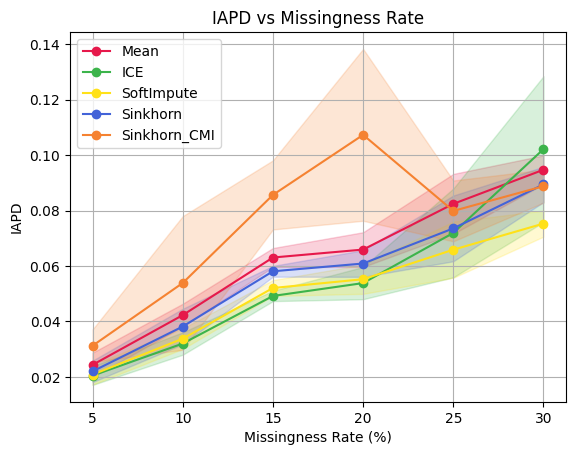

In [27]:
import matplotlib.pyplot as plt
import numpy as np

missing_rates = [5,10,15,20,25, 30]
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231']

# Replace the below placeholders with actual numpy arrays (shape: [6, 4] if 4 runs per rate)
iapd_results = {
    'Mean': [mean_iapd5, mean_iapd10, mean_iapd15, mean_iapd20, mean_iapd25, mean_iapd30],
    'ICE': [ice_iapd5, ice_iapd10, ice_iapd15, ice_iapd20, ice_iapd25, ice_iapd30],
    'SoftImpute': [soft_iapd5, soft_iapd10, soft_iapd15, soft_iapd20, soft_iapd25, soft_iapd30],
    'Sinkhorn': [sk_iapd5, sk_iapd10, sk_iapd15, sk_iapd20, sk_iapd25,sk_iapd30],
    'Sinkhorn_CMI': [sk_cmi_iapd5,sk_cmi_iapd10,sk_cmi_iapd15,sk_cmi_iapd20,sk_cmi_iapd25,sk_cmi_iapd30]
}



fig, ax1 = plt.subplots()
# Now ax1 is a single Axes object



for i, algo in enumerate(algorithms):
    data = np.array(iapd_results[algo])
    means = np.mean(data, axis=1)
    stds = np.std(data, axis=1)
    ax1.plot(missing_rates, means, label=algo, color=colors[i], marker='o')
    ax1.fill_between(missing_rates, means - stds, means + stds, alpha=0.2, color=colors[i])

ax1.set_ylabel('IAPD')
ax1.set_xlabel('Missingness Rate (%)')
ax1.set_title('IAPD vs Missingness Rate')
ax1.grid(True)
ax1.legend()



### Machine Learning

In [15]:
k = 4  # Choose the number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [16]:

missing_type = "MCAR"
missing_rate = 25
dependencies = None
highest_lamda_cmi = 15 
niter = 5000
accuracy_sk=[]
accuracy_sk_cmi=[]
accuracy_mean = []
accuracy_ice = []
accuracy_soft_imp = []
demoP_sk = []
demoP_sk_cmi = []
demoP_mean = []
demoP_ice = []
demoP_soft_imp = []
# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()


    y_test = (y_test > 0).astype(int)
    y_train = (y_train > 0).astype(int)
    
    acc_sk, dp_sk = machineLearning(x_train_sk_imp_data, y_train, x_test, y_test,1)
    accuracy_sk.append(acc_sk)
    demoP_sk.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi = machineLearning(x_train_sk_cmi_imp_data, y_train, x_test, y_test,1)
    accuracy_sk_cmi.append(acc_sk_cmi)
    demoP_sk_cmi.append(dp_sk_cmi)

    acc_mean, dp_mean = machineLearning(x_train_mean_imp_data, y_train, x_test, y_test,1)
    accuracy_mean.append(acc_mean)
    demoP_mean.append(dp_mean)

    acc_ice, dp_ice = machineLearning(x_train_ice_imp_data, y_train, x_test, y_test,1)
    accuracy_ice.append(acc_ice)
    demoP_ice.append(dp_ice)

    acc_soft_imp, dp_soft_imp = machineLearning(x_train_soft_imp_data, y_train, x_test, y_test,1)
    accuracy_soft_imp.append(acc_soft_imp)
    demoP_soft_imp.append(dp_soft_imp) 


INFO:root:batchsize = 128, epsilon = 0.7743
INFO:root:Iteration 0:	 Loss: 6.0746
INFO:root:Iteration 50:	 Loss: 5.3011
INFO:root:Iteration 100:	 Loss: 5.4920
INFO:root:Iteration 150:	 Loss: 4.9965
INFO:root:Iteration 200:	 Loss: 5.5480
INFO:root:Iteration 250:	 Loss: 5.6908
INFO:root:Iteration 300:	 Loss: 5.0774
INFO:root:Iteration 350:	 Loss: 5.7106
INFO:root:Iteration 400:	 Loss: 6.0416
INFO:root:Iteration 450:	 Loss: 5.1428
INFO:root:Iteration 500:	 Loss: 5.7598
INFO:root:Iteration 550:	 Loss: 5.1567
INFO:root:Iteration 600:	 Loss: 5.2347
INFO:root:Iteration 650:	 Loss: 5.3251
INFO:root:Iteration 700:	 Loss: 5.4131
INFO:root:Iteration 750:	 Loss: 5.4323
INFO:root:Iteration 800:	 Loss: 4.8993
INFO:root:Iteration 850:	 Loss: 5.3890
INFO:root:Iteration 900:	 Loss: 5.3398
INFO:root:Iteration 950:	 Loss: 5.5890
INFO:root:Iteration 1000:	 Loss: 5.7949
INFO:root:Iteration 1050:	 Loss: 5.3196
INFO:root:Iteration 1100:	 Loss: 5.3026
INFO:root:Iteration 1150:	 Loss: 5.4796
INFO:root:Iteration

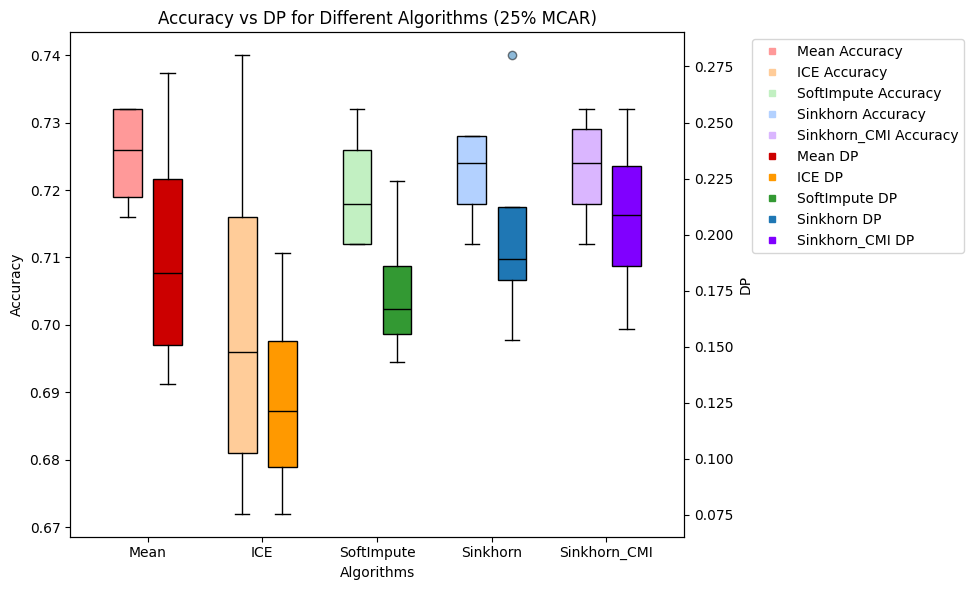

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mcar25 = {
    'Mean': accuracy_mean,
    'ICE': accuracy_ice,
    'SoftImpute': accuracy_soft_imp,
    'Sinkhorn': accuracy_sk,
    'Sinkhorn_CMI': accuracy_sk_cmi
}
dp_mcar25 = {
    'Mean': demoP_mean,
    'ICE': demoP_ice,
    'SoftImpute': demoP_soft_imp,
    'Sinkhorn': demoP_sk,
    'Sinkhorn_CMI': demoP_sk_cmi
}

# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mcar25[algo]
    dp_vals = dp_mcar25[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('DP', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (25% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Machine Learning

In [ ]:
k = 5  # Choose the number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)


In [ ]:
x = groundTruth.iloc[:, :-1]  # x is not scaled
y = groundTruth.iloc[:, -1]  # y is not scaled

MCAR 30%

In [ ]:

missing_type = "MCAR"
missing_rate = 30
dependencies = None
highest_lamda_cmi = 30
niter = 5000
protected_index = 19
accuracy_sk_mcar30 = []
accuracy_sk_cmi_mcar30 = []
accuracy_mean_mcar30 = []
accuracy_ice_mcar30 = []
accuracy_soft_imp_mcar30 = []
demoP_sk_mcar30 = []
demoP_sk_cmi_mcar30 = []
demoP_mean_mcar30 = []
demoP_ice_mcar30 = []
demoP_soft_imp_mcar30 = []
equiod_sk_mcar30 = []
equiod_sk_cmi_mcar30 = []
equiod_mean_mcar30 = []
equiod_ice_mcar30 = []
equiod_soft_imp_mcar30 = []
bucket = {19:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) # converting x_trian and x_test to z-score
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_mcar30.append(eod_sk)
    accuracy_sk_mcar30.append(acc_sk)
    demoP_sk_mcar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_sk_cmi_mcar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mcar30.append(acc_sk_cmi)
    demoP_sk_cmi_mcar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_mean_mcar30.append(eod_mean)
    accuracy_mean_mcar30.append(acc_mean)
    demoP_mean_mcar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_ice_mcar30.append(eod_ice)
    accuracy_ice_mcar30.append(acc_ice)
    demoP_ice_mcar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test, protected_index, bucket)
    equiod_soft_imp_mcar30.append(eod_soft_imp)
    accuracy_soft_imp_mcar30.append(acc_soft_imp)
    demoP_soft_imp_mcar30.append(dp_soft_imp) 


INFO:root:batchsize = 128, epsilon = 0.4080
INFO:root:Iteration 0:	 Loss: 1.8731
INFO:root:Iteration 0:	 Loss: 2.0624


[[-1.4975383   0.         -1.7423915  ... -0.83441341 -0.38867084
  -1.11040502]
 [ 0.03553776  1.         -0.53612046 ... -0.83441341  0.06143132
   0.61090244]
 [-1.81792141  0.         -1.7423915  ... -0.83441341 -0.13482147
  -1.11040502]
 ...
 [-0.0821691   0.          0.67015058 ... -0.83441341  2.24291713
   0.61090244]
 [ 0.31796595  0.          0.18399093 ...  1.19844671  0.2432218
   0.61090244]
 [-1.71112704  0.         -0.53612046 ... -0.83441341  0.0095576
   0.10937485]]
[[-1.57220366  0.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 [ 0.026175    0.         -1.72025722 ... -0.84599688 -0.83473854
  -1.08005542]
 [-1.78532082  1.         -0.53315896 ... -0.84599688 -0.83473854
  -1.08005542]
 ...
 [ 0.34585073  1.          0.6539393  ...  1.18203745 -0.6523921
   0.604929  ]
 [-0.9328522   0.          1.84103756 ... -0.84599688  0.2593401
   0.604929  ]
 [ 0.34585073  1.         -1.72025722 ... -0.84599688 -0.83473854
   0.604929  ]]
[0. 0. 1. 0. 0. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4104
INFO:root:Iteration 0:	 Loss: 2.0626
INFO:root:Iteration 0:	 Loss: 1.9687


[[-1.44409964  0.          0.0434353  ... -0.84604342 -0.3070531
  -1.04973197]
 [-0.48381937  1.         -0.50946432 ...  0.09267898  0.05723557
   0.18834271]
 [ 0.04966967  0.         -0.03517962 ... -0.84604342 -0.86499877
  -1.04973197]
 ...
 [ 0.36976309  0.         -0.12657896 ... -0.11412183  0.24168244
   0.56817176]
 [ 0.36976309  1.          0.0508131  ... -0.84604342 -0.86499877
   0.56817176]
 [-1.65749526  0.         -0.50946432 ... -0.28982656 -0.86499877
  -0.26128834]]
[[-1.72576442  0.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 [-0.57230817  1.          0.62747666 ...  1.22178297  0.57273059
   0.60349268]
 [-0.88688715  1.         -1.69351227 ... -0.81847597 -0.83622761
  -1.0507024 ]
 ...
 [ 0.47628842  1.          0.62747666 ...  1.22178297  1.79382769
   0.60349268]
 [ 0.26656911  0.         -1.69351227 ... -0.81847597 -0.83622761
   2.25768777]
 [ 0.16170945  1.         -1.69351227 ... -0.81847597  0.29093895
  -1.0507024 ]]
[0. 1. 1. 1. 0. 0

INFO:root:batchsize = 128, epsilon = 0.4085
INFO:root:Iteration 0:	 Loss: 2.0431
INFO:root:Iteration 0:	 Loss: 1.8239


[[-0.48616553  1.         -0.08232872 ... -0.78776099  0.10379823
   0.58525552]
 [-1.76121163  0.         -1.79125518 ... -0.78776099 -0.80993203
  -0.98069843]
 [-0.59241938  1.          0.6698178  ...  0.42661211  0.23069028
   0.41237101]
 ...
 [ 0.23945996  0.          0.39032343 ... -0.19435051  0.28654428
   0.58525552]
 [ 0.10828703  0.          0.6698178  ... -0.78776099  2.29675084
   0.58525552]
 [ 0.36386519  0.         -1.79125518 ... -0.78776099 -0.80993203
   0.58525552]]
[[-1.45216045  0.         -1.72740741 ... -0.81501608 -0.82123745
  -1.02496347]
 [-1.77384255  0.          0.63641326 ...  1.22696966  0.59950059
   0.59105445]
 [-1.66661518  0.          0.63641326 ... -0.81501608 -0.82123745
   0.59105445]
 ...
 [ 1.01406896  1.          0.63641326 ...  1.22696966 -0.82123745
   0.59105445]
 [ 0.37070477  0.          0.63641326 ...  1.22696966  0.31535298
   0.59105445]
 [-1.66661518  0.         -0.54549708 ... -0.81501608 -0.82123745
  -1.02496347]]
[0. 0. 0. 1. 0. 

INFO:root:batchsize = 128, epsilon = 0.4108
INFO:root:Iteration 0:	 Loss: 2.2192
INFO:root:Iteration 0:	 Loss: 2.3084


[[-1.48244723  0.         -1.75723628 ... -0.79582243 -0.83616312
  -0.29061359]
 [ 0.17210947  0.         -0.05212044 ... -0.79582243 -0.83616312
  -1.04295683]
 [-0.02988282  0.          0.21118362 ... -0.03300928  0.59559646
   0.10747826]
 ...
 [ 0.36637989  0.          0.61321487 ...  1.25656172  0.30924455
   0.61067867]
 [ 0.36637989  1.         -1.75723628 ... -0.79582243 -0.83616312
   0.61067867]
 [ 0.09160372  0.         -0.57201071 ... -0.79582243 -0.24759068
  -1.04295683]]
[[-0.45357081  1.         -0.51267508 ... -0.81501608  0.11800232
   0.58554834]
 [ 0.0752114   0.         -0.51267508 ... -0.81501608 -0.83851061
  -1.05446306]
 [-0.45357081  0.          0.65697104 ...  1.22696966  0.11800232
   0.58554834]
 ...
 [ 1.45004515  0.         -0.51267508 ... -0.81501608 -0.07330027
   0.58554834]
 [-1.29962235  0.         -1.6823212  ... -0.81501608 -0.83851061
  -1.05446306]
 [ 1.5558016   0.          0.65697104 ... -0.81501608  2.41363335
   0.58554834]]
[1. 0. 0. 1. 1. 

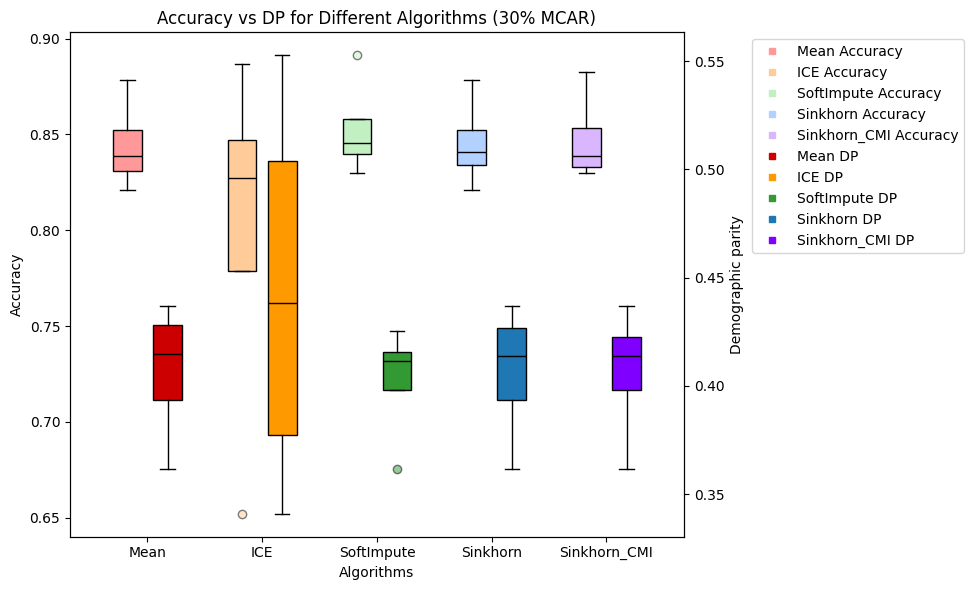

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mcar30 = {
    'Mean': accuracy_mean_mcar30,
    'ICE': accuracy_ice_mcar30,
    'SoftImpute': accuracy_soft_imp_mcar30,
    'Sinkhorn': accuracy_sk_mcar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mcar30
}
dp_mcar30 = {
    'Mean': demoP_mean_mcar30,
    'ICE': demoP_ice_mcar30,
    'SoftImpute': demoP_soft_imp_mcar30,
    'Sinkhorn': demoP_sk_mcar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mcar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mcar30[algo]
    dp_vals = dp_mcar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MCAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


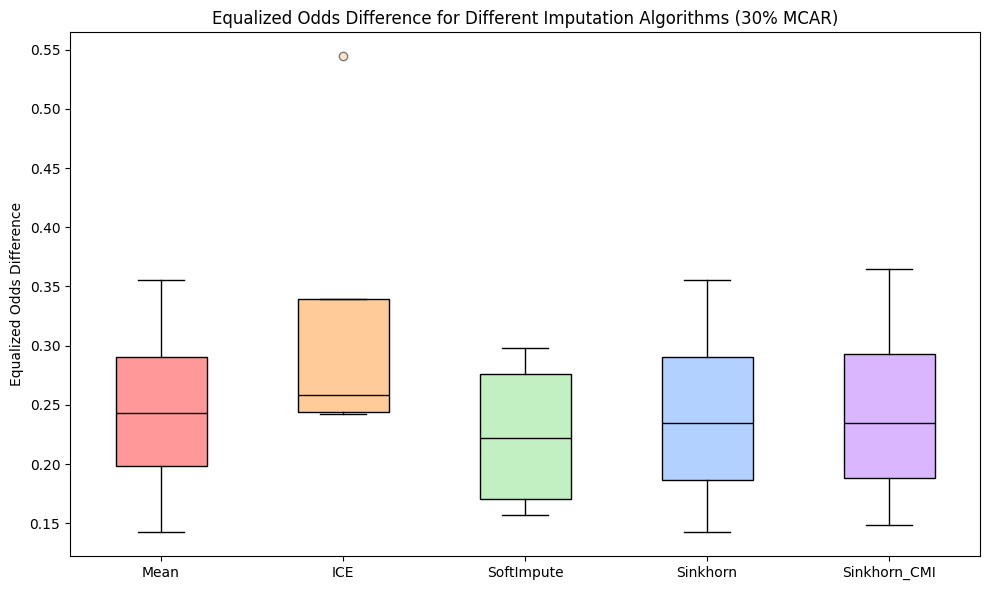

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mcar30 = {
    'Mean': equiod_mean_mcar30,
    'ICE': equiod_ice_mcar30,
    'SoftImpute': equiod_soft_imp_mcar30,
    'Sinkhorn': equiod_sk_mcar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mcar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mcar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MCAR)')

plt.tight_layout()
plt.show()


MAR 30%

In [ ]:

missing_type = "MAR"
missing_rate = 30
dependencies = dependencies_mar
highest_lamda_cmi = 30
niter = 5000
protected_index = 19
accuracy_sk_mar30 = []
accuracy_sk_cmi_mar30 = []
accuracy_mean_mar30 = []
accuracy_ice_mar30 = []
accuracy_soft_imp_mar30 = []
demoP_sk_mar30 = []
demoP_sk_cmi_mar30 = []
demoP_mean_mar30 = []
demoP_ice_mar30 = []
demoP_soft_imp_mar30 = []
equiod_sk_mar30 = []
equiod_sk_cmi_mar30 = []
equiod_mean_mar30 = []
equiod_ice_mar30 = []
equiod_soft_imp_mar30 = []
bucket = {19:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mar30.append(eod_sk)
    accuracy_sk_mar30.append(acc_sk)
    demoP_sk_mar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mar30.append(acc_sk_cmi)
    demoP_sk_cmi_mar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mar30.append(eod_mean)
    accuracy_mean_mar30.append(acc_mean)
    demoP_mean_mar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mar30.append(eod_ice)
    accuracy_ice_mar30.append(acc_ice)
    demoP_ice_mar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mar30.append(eod_soft_imp)
    accuracy_soft_imp_mar30.append(acc_soft_imp)
    demoP_soft_imp_mar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mar30 = {
    'Mean': accuracy_mean_mar30,
    'ICE': accuracy_ice_mar30,
    'SoftImpute': accuracy_soft_imp_mar30,
    'Sinkhorn': accuracy_sk_mar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mar30
}
dp_mar30 = {
    'Mean': demoP_mean_mar30,
    'ICE': demoP_ice_mar30,
    'SoftImpute': demoP_soft_imp_mar30,
    'Sinkhorn': demoP_sk_mar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mar30[algo]
    dp_vals = dp_mar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mar30 = {
    'Mean': equiod_mean_mar30,
    'ICE': equiod_ice_mar30,
    'SoftImpute': equiod_soft_imp_mar30,
    'Sinkhorn': equiod_sk_mar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MAR)')

plt.tight_layout()
plt.show()


30% MNAR

In [ ]:

missing_type = "MNAR"
missing_rate = 30
dependencies = dependencies_mnar
highest_lamda_cmi = 30
niter = 5000
protected_index = 19
accuracy_sk_mnar30 = []
accuracy_sk_cmi_mnar30 = []
accuracy_mean_mnar30 = []
accuracy_ice_mnar30 = []
accuracy_soft_imp_mnar30 = []
demoP_sk_mnar30 = []
demoP_sk_cmi_mnar30 = []
demoP_mean_mnar30 = []
demoP_ice_mnar30 = []
demoP_soft_imp_mnar30 = []
equiod_sk_mnar30 = []
equiod_sk_cmi_mnar30 = []
equiod_mean_mnar30 = []
equiod_ice_mnar30 = []
equiod_soft_imp_mnar30 = []
bucket = {19:2} 


# X and Y is scaled to z-score

for fold, (train_index, test_index) in enumerate(kf.split(x)):
    x_train = x.iloc[train_index].reset_index(drop=True)  # No index numbers
    x_test = x.iloc[test_index].reset_index(drop=True)    # No index numbers
    y_train = y.iloc[train_index].reset_index(drop=True)  # No index numbers
    y_test = y.iloc[test_index].reset_index(drop=True)    # No index numbers

    #z-score

    scaler = StandardScaler()
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
    x_test = scaler.transform(x_test)
   

    
    x_train_sk_imp_data, x_train_sk_cmi_imp_data, x_train_mean_imp_data, x_train_ice_imp_data, x_train_soft_imp_data = imputation(x_train, y_train, missing_type, missing_rate, dependencies, highest_lamda_cmi, niter, bucket_specs, X_cols, Y_cols, Z_cols)
    
   

    

    y_test = y_test.to_numpy()
    y_train = y_train.to_numpy()

    
    acc_sk, dp_sk, eod_sk = machineLearning(x_train_sk_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_mnar30.append(eod_sk)
    accuracy_sk_mnar30.append(acc_sk)
    demoP_sk_mnar30.append(dp_sk)

    acc_sk_cmi, dp_sk_cmi, eod_sk_cmi = machineLearning(x_train_sk_cmi_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_sk_cmi_mnar30.append(eod_sk_cmi)
    accuracy_sk_cmi_mnar30.append(acc_sk_cmi)
    demoP_sk_cmi_mnar30.append(dp_sk_cmi)

    acc_mean, dp_mean, eod_mean = machineLearning(x_train_mean_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_mean_mnar30.append(eod_mean)
    accuracy_mean_mnar30.append(acc_mean)
    demoP_mean_mnar30.append(dp_mean)

    acc_ice, dp_ice, eod_ice = machineLearning(x_train_ice_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_ice_mnar30.append(eod_ice)
    accuracy_ice_mnar30.append(acc_ice)
    demoP_ice_mnar30.append(dp_ice)

    acc_soft_imp, dp_soft_imp, eod_soft_imp = machineLearning(x_train_soft_imp_data[:, :-1], y_train, x_test, y_test,protected_index,bucket)
    equiod_soft_imp_mnar30.append(eod_soft_imp)
    accuracy_soft_imp_mnar30.append(acc_soft_imp)
    demoP_soft_imp_mnar30.append(dp_soft_imp) 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with actual data
accuracy_mnar30 = {
    'Mean': accuracy_mean_mnar30,
    'ICE': accuracy_ice_mnar30,
    'SoftImpute': accuracy_soft_imp_mnar30,
    'Sinkhorn': accuracy_sk_mnar30,
    'Sinkhorn_CMI': accuracy_sk_cmi_mnar30
}
dp_mnar30 = {
    'Mean': demoP_mean_mnar30,
    'ICE': demoP_ice_mnar30,
    'SoftImpute': demoP_soft_imp_mnar30,
    'Sinkhorn': demoP_sk_mnar30,
    'Sinkhorn_CMI': demoP_sk_cmi_mnar30
}




# Colors (light for MAE, dark for CMI)
color_pairs = [
    ('#ff9999', '#cc0000'),  # Mean
    ('#ffcc99', '#ff9900'),  # ICE
    ('#c2f0c2', '#339933'),  # SoftImpute
    ('#b3d1ff', '#1f77b4'),  # Sinkhorn
    ('#dab6ff', '#8000ff')   # Sinkhorn_CMI
]

x = np.arange(len(algorithms))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot each algorithm's box individually
for i, algo in enumerate(algorithms):
    accuracy_vals = accuracy_mnar30[algo]
    dp_vals = dp_mnar30[algo]

    # MAE box (lighter color)
    ax1.boxplot(accuracy_vals, positions=[x[i] - width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][0], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][0], marker='o', alpha=0.5))

    # CMI box (darker color)
    ax2.boxplot(dp_vals, positions=[x[i] + width/2], widths=0.25, patch_artist=True,
                boxprops=dict(facecolor=color_pairs[i][1], color='black'),
                medianprops=dict(color='black'),
                capprops=dict(color='black'),
                whiskerprops=dict(color='black'),
                flierprops=dict(markerfacecolor=color_pairs[i][1], marker='o', alpha=0.5))

# Axes settings
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color='black')
ax2.set_ylabel('Demographic parity', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('Accuracy vs DP for Different Algorithms (30% MNAR)')

ax1.tick_params(axis='y', labelcolor='black')
ax2.tick_params(axis='y', labelcolor='black')

# Custom legend
handles = [
    plt.Line2D([], [], color=pair[0], marker='s', linestyle='None', markersize=5, label=f'{algo} Accuracy')
    for algo, pair in zip(algorithms, color_pairs)
] + [
    plt.Line2D([], [], color=pair[1], marker='s', linestyle='None', markersize=5, label=f'{algo} DP')
    for algo, pair in zip(algorithms, color_pairs)
]
ax1.legend(handles=handles, bbox_to_anchor=(1.10, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_mean_mar30' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define algorithms
algorithms = ['Mean', 'ICE', 'SoftImpute', 'Sinkhorn', 'Sinkhorn_CMI']

# Replace with your actual EOD results (lists or numpy arrays)
eod_mnar30 = {
    'Mean': equiod_mean_mnar30,
    'ICE': equiod_ice_mnar30,
    'SoftImpute': equiod_soft_imp_mnar30,
    'Sinkhorn': equiod_sk_mnar30,
    'Sinkhorn_CMI': equiod_sk_cmi_mnar30
}

# Colors for EOD
colors = ['#ff9999', '#ffcc99', '#c2f0c2', '#b3d1ff', '#dab6ff']

# Create boxplot
x = np.arange(len(algorithms))

fig, ax = plt.subplots(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    eod_vals = eod_mnar30[algo]
    ax.boxplot(eod_vals, positions=[x[i]], widths=0.5, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'),
               medianprops=dict(color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(markerfacecolor=colors[i], marker='o', alpha=0.5))

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.set_ylabel('Equalized Odds Difference')
ax.set_title('Equalized Odds Difference for Different Imputation Algorithms (30% MNAR)')

plt.tight_layout()
plt.show()
